In [1]:
import matplotlib.pyplot as plt

import numpy as np
import scipy as sp

np.seterr(all="ignore")

from threeML import *
from threeML.io.package_data import get_path_of_data_file
from threeML.io import update_logging_level
from threeML.utils.data_download.Fermi_LAT.download_LAT_data import LAT_dataset
from astropy.io import fits as pyfits

SMALL_SIZE = 15
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title


# This if you want to toggle different type of logging level.
update_logging_level("INFO")
log.error("error")
log.info("info")
log.debug("debug")

13:18:28 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=788228;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=792411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#50\50]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=667652;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=135653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=149274;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=23302;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

13:18:31 ERROR     error                                                                           ]8;id=348940;file:///var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/ipykernel_64381/3699701126.py\3699701126.py]8;;\:]8;id=244840;file:///var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/ipykernel_64381/3699701126.py#29\29]8;;\

         INFO      info                                                                            ]8;id=185269;file:///var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/ipykernel_64381/3699701126.py\3699701126.py]8;;\:]8;id=858878;file:///var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/ipykernel_64381/3699701126.py#30\30]8;;\

## GtBurst
Gtburst contains all the classes and methods to perform Fermi LAT data. It internally uses the official fermitools software. Here an example to list the IRFS available:


In [2]:
from GtBurst import IRFS

irfs = IRFS.IRFS.keys()
print(irfs)

odict_keys(['p7rep_transient', 'p7rep_source', 'p7rep_clean', 'p7rep_ultraclean', 'p8r2_transient100e', 'p8r2_transient100', 'p8r2_transient020e', 'p8r2_transient020', 'p8r2_transient010e', 'p8r2_transient010', 'p8r2_source', 'p8r2_clean', 'p8r2_ultraclean', 'p8r2_ultracleanveto', 'p8r2_transient100s', 'p8r2_transient015s', 'p8_transient100e', 'p8_transient100', 'p8_transient020e', 'p8_transient020', 'p8_transient010e', 'p8_transient010', 'p8_source', 'p8_clean', 'p8_ultraclean', 'p8_ultracleanveto', 'p8_sourceveto', 'p8_transient100s', 'p8_transient015s'])


## The LAT Transient Builder
Let's see how to make a plug in for the unbinned analysis of Fermi LAT data. First we use the information form a triggered GRB to obtain MET, RA and DEC, that are needed for the analysis.


In [3]:
from GtBurst.TriggerSelector import TriggerSelector

myFavoriteGRB = "bn190114873"


def findGRB(grb_name):
    a = TriggerSelector()
    a.downloadList()
    myGRB = {}
    for x in a.data:
        if x[0] == myFavoriteGRB:
            myGRB["MET"] = float(x[1])
            myGRB["RA"] = float(x[3])
            myGRB["DEC"] = float(x[4])
            myGRB["ERR"] = float(x[5])
            return myGRB
            pass
    return None

In [4]:
myGRB = findGRB(myFavoriteGRB)
print(myGRB)

{'MET': 569192227.626, 'RA': 54.51, 'DEC': -26.939, 'ERR': 0.05}


Then, we download LAT data and we build the transient builder, we want to analyze 1000 seconds since the trigger. Let's start download the data:


In [5]:
tstart = 0
tstop = 1000

In [6]:
myLATdataset = LAT_dataset()

myLATdataset.make_LAT_dataset(
    ra=myGRB["RA"],
    dec=myGRB["DEC"],
    radius=12,
    trigger_time=myGRB["MET"],
    tstart=tstart,
    tstop=tstop,
    data_type="Extended",
    destination_directory=".",
    Emin=100.0,
    Emax=10000.0,
)  # Energies are MeV (this is from 100 MeV to 10 GeV)

13:18:42 INFO      Query parameters:                                                       ]8;id=200563;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=463902;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#262\262]8;;\

         INFO                          coordfield = 54.5100,-26.9390                       ]8;id=226737;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=867322;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                         coordsystem = J2000                                  ]8;id=253783;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=610908;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                          shapefield = 12                                     ]8;id=228630;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=120410;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                           timefield = 569192227.626,569193227.626            ]8;id=298850;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=419826;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                            timetype = MET                                    ]8;id=582637;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=572538;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                         energyfield = 100.000,10000.000                      ]8;id=485672;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=399789;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO              photonOrExtendedOrNone = Extended                               ]8;id=633726;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=78183;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                         destination = query                                  ]8;id=887318;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=38739;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                          spacecraft = checked                                ]8;id=244520;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=573555;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO      Query ID: 86ad4d2b3b3e5065f0f0a976e6fc8315                              ]8;id=229480;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=68730;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#271\271]8;;\

         INFO      Estimated complete time for your query: 15 seconds                      ]8;id=92437;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=258161;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#427\427]8;;\

         INFO      If this download fails, you can find your data at                       ]8;id=12278;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=256189;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#436\436]8;;\
                  https://fermi.gsfc.nasa.gov/cgi-bin/ssc/LAT/QueryResults.cgi?id=L2209280                         
                  91843B4ACFA2F71 (when ready)                                                                     

13:18:49 INFO      Downloading FT1 and FT2 files...                                        ]8;id=844167;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=828772;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#526\526]8;;\

13:18:54 WARNING   Only one FT1 file provided. Skipping the merge...                        ]8;id=899283;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=416091;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#98\98]8;;\

Writing ./bn190114873/gll_cspec_tr_bn190114873_v00.rsp...
time -p gtselect infile=./bn190114873/gll_ft1_tr_bn190114873_v00.fit outfile=__temp_ft1.fits ra=54.51 dec=-26.939 rad=15.0 tmin=569192226.626 tmax=569193228.626 emin=10.0 emax=300000.0 zmin=0.0 zmax=110.0 evclass="INDEF" evtype="INDEF" convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"
Done.
real 0.13
user 0.09
sys 0.03
Writing ./bn190114873/gll_cspec_tr_bn190114873_v00.pha...
 *  Get energy binning from the response matrix...

    done.

 *  Run gtbindef and gtbin and bin in energy and time...

time -p gtbindef bintype="E" binfile=__ebins.txt outfile=__energyBins.fits energyunits="keV" chatter=2 clobber=yes debug=no gui=no mode="ql"


This is gtbindef version HEAD
real 0.24
user 0.01
sys 0.02
time -p gtbin evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/__temp_ft1.fits scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit outfile=__gtllebin__pha2.pha algorithm="PHA2" ebinalg="FILE" emin=30.0 emax=200000.0 ebinfile=__energyBins.fits tbinalg="LIN" tstart=569192227.626 tstop=569193227.626 dtime=4.096 tbinfile=NONE coordsys="CEL" axisrot=0.0 rafield="RA" decfield="DEC" proj="AIT" hpx_ordering_scheme="RING" hpx_order=3 hpx_ebin=yes hpx_region="" evtable="EVENTS" sctable="SC_DATA" efield="ENERGY" tfield="TIME" chatter=1 clobber=yes debug=no gui=no mode="ql"
This is gtbin version HEAD


real 2.93
user 2.51
sys 0.40

    done.

 *  Transform gtbin output in CSPEC format...

    done.

 *  Updating keywords in the headers of the CSPEC file...

    done.

gtllebin done!


We want perform a time resolved analysis. So, first we look at the data. We can play with the ROI selection and the cut.


In [7]:
roi = 10
zmax = 110.0
thetamax = 180.0
irfs = "p8_transient020e"
strategy = "time"
myLATdataset.extract_events(roi, zmax, irfs, thetamax, strategy="time")

time -p gtmktime scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" filter="(DATA_QUAL>0 || DATA_QUAL==-1) && LAT_CONFIG==1 && IN_SAA!=T && LIVETIME>0 && (ANGSEP(RA_ZENITH,DEC_ZENITH,54.51,-26.939)<=(110.0-10))" roicut=no evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft1_tr_bn190114873_v00.fit evtable="EVENTS" outfile="gll_ft1_tr_bn190114873_v00_mkt.fit" apply_filter=yes overwrite=no header_obstimes=yes tstart=569192227.626 tstop=569193227.626 gtifile="default" chatter=2 clobber=yes debug=no gui=no mode="ql"
real 0.11
user 0.07
sys 0.03

Using 305 data

time -p gtselect infile=gll_ft1_tr_bn190114873_v00_mkt.fit outfile=gll_ft1_tr_bn190114873_v00_filt.fit ra=54.51 dec=-26.939 rad=10.0 tmin=569192227.626 tmax=569193227.626 emin=100.0 emax=10000.0 zmin=0.0 zmax=110.0 evclass=8 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=

Done.
real 0.13
user 0.09
sys 0.03

Selected 251 events.


13:18:58 INFO      Extracted 251 events                                                    ]8;id=160601;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=20176;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#669\669]8;;\

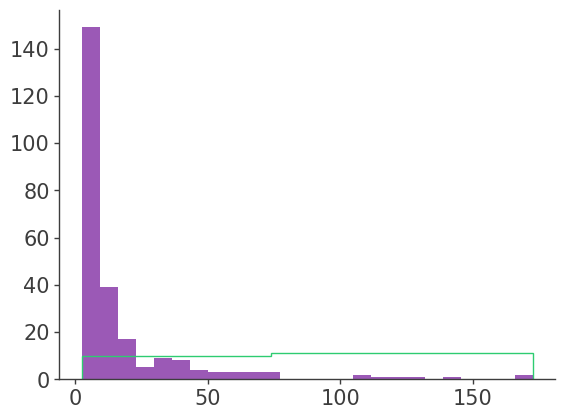

In [8]:
%matplotlib inline
event_file = pyfits.open(myLATdataset.filt_file)
event_times = sorted(event_file["EVENTS"].data["TIME"] - myGRB["MET"])
intervals = event_times[0::10]
_ = plt.hist(event_times)
_ = plt.hist(event_times, intervals, histtype="step")
# plt.show()

tstarts and tstops are defined as strings, with somma separated values for the starts and the ends of the time bins: For example tsrats="0,1,10" and tstops="1,10,20". To convert arrays in string we use these few lines of code:


In [9]:
tstarts = tstops = ""
for t0, t1 in zip(intervals[:-1], intervals[1:]):
    tstarts += "%.4f," % t0
    tstops += "%.4f," % t1
    pass
tstarts = tstarts[:-1].replace("-", "\\-")
tstops = tstops[:-1].replace("-", "\\-")

We can now make an instance the LAT transient builder


In [10]:
analysis_builder = TransientLATDataBuilder(
    myLATdataset.grb_name,
    outfile=myLATdataset.grb_name,
    roi=roi,
    tstarts=tstarts,
    tstops=tstops,
    irf=irfs,
    zmax=zmax,
    galactic_model="template",
    particle_model="isotr template",
    datarepository=".",
)
df = analysis_builder.display(get=True)

outfile                                                       190114873
roi                                                                  10
tstarts               2.6996,3.6358,3.9968,4.4024,4.7375,5.0909,5.54...
tstops                3.6358,3.9968,4.4024,4.7375,5.0909,5.5471,5.98...
zmax                                                              110.0
emin                                                              100.0
emax                                                           100000.0
irf                                                    p8_transient020e
galactic_model                                                 template
particle_model                                           isotr template
source_model                                                  PowerLaw2
tsmin                                                              20.0
strategy                                                           time
thetamax                                                        

In [11]:
tstops

'3.6358,3.9968,4.4024,4.7375,5.0909,5.5471,5.9896,6.3998,6.6889,7.0117,7.2936,7.7731,8.2167,8.8763,9.6573,10.5680,12.0568,14.6165,17.7834,21.4962,30.0798,40.8747,48.7118,73.7262,172.5754'

The run method will run (using gtburst) all the fermitools needed to obtain the needed file for the likelihood analysis (livetimecubes, exposure maps. It will also perfom a simple likelihood analysis with the standard likelihood of the fermitools (pylikelihood). The dataproducts created here will be used by threeML to make the fit.


In [12]:
LAT_observations = analysis_builder.run(include_previous_intervals=True)

Changing permission to /usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/scripts/doTimeResolvedLike.py
Changing permission to /usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/gtapps_mp/gtdiffrsp_mp.py
Changing permission to /usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/gtapps_mp/gtexpmap_mp.py
Changing permission to /usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/gtapps_mp/gtltcube_mp.py
Changing permission to /usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/gtapps_mp/gttsmap_mp.py


         INFO      About to run the following command:                                 ]8;id=147624;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=911800;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#636\636]8;;\
                  /usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermi                             
                  tools/GtBurst/scripts/doTimeResolvedLike.py 190114873 --outfile                                  
                  '190114873' --roi 10.000000 --tstarts                                                            
                  '2.6996,3.6358,3.9968,4.4024,4.7375,5.0909,5.5471,5.9896,6.3998,6.68                             
                  89,7.0117,7.2936,7.7731,8.2167,8.8763,9.6573,10.5680,12.0568,14.6165                             
                  ,17.7834,21.4962,30.0798,40.8747,48.7118,73.7262' --tstops                                       
                  '3.6358,3.9968,4.4024,4.7375,5.0909,5.5471,5.9896,6.3998,6.6889,7.01                             
                  17,7.2936,7.7731,8.2167,8.8763,9.6573,10.5680,12.0568,14.6165,17.783                             
                  4,21.4962,30.0798,40.8747,48.7118,73.7262,172.5754' --zmax                                       
                  110.000000 --emin 100.000000 --emax 100000.000000 --irf                                          
                  'p8_transient020e' --galactic_model 'template' --particle_model                                  
                  'isotr template' --source_model 'PowerLaw2' --tsmin 20.000000                                    
                  --strategy 'time' --thetamax 180.000000 --spectralfiles 'no'                                     
                  --liketype 'unbinned' --optimizeposition 'no' --datarepository '.'                               
                  --ltcube '' --expomap '' --ulphindex -2.000000 --flemin 100.000000                               
                  --flemax 10000.000000 --fgl_mode 'fast'                                                          

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   25.19240     FROM MIGRAD    STATUS=CONVERGED     60 CALLS       61 TOTAL
                     EDM=   .29E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

/usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/MPLPlot.py:54: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()
/usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/MPLPlot.py:65: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()


 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   13.71579     FROM MIGRAD    STATUS=CONVERGED     59 CALLS       60 TOTAL
                     EDM=   .58E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA


Requested intervals:
------------------------------------------------------
2.6996               - 3.6358
3.6358               - 3.9968
3.9968               - 4.4024
4.4024               - 4.7375
4.7375               - 5.0909
5.0909               - 5.5471
5.5471               - 5.9896
5.9896               - 6.3998
6.3998               - 6.6889
6.6889               - 7.0117
7.0117               - 7.2936
7.2936               - 7.7731
7.7731               - 8.2167
8.2167               - 8.8763
8.8763               - 9.6573
9.6573               - 10.568
10.568               - 12.0568
12.0568              - 14.6165
14.6165              - 17.7834
17.7834              - 21.4962
21.4962              - 30.0798
30.0798              - 40.8747
40.8747              - 48.7118
48.7118              - 73.7262
73.7262              - 172.5754

Data files:
-----------
eventfile            /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft1_tr_bn190114873_v00.fit
ft2file      

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   4.786573     FROM MIGRAD    STATUS=CONVERGED     59 CALLS       60 TOTAL
                     EDM=   .14E-02    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   5.901543     FROM MIGRAD    STATUS=CONVERGED     60 CALLS       61 TOTAL
                     EDM=   .70E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

time -p gtdiffrsp evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval3.6358-3.9968/gll_ft1_tr_bn190114873_v00_filt.fit evtable="EVENTS" scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" srcmdl=190114873_LAT_xmlmodel_3.6358-3.9968.xml irfs="P8R3_TRANSIENT020E_V3" evclsmin="INDEF" evclass="INDEF" evtype="INDEF" convert=no chatter=2 clobber=yes debug=no gui=no mode="ql"
adding source 4FGL J0322.6-3712e
adding source GalacticTemplate
adding source IsotropicTemplate
Working on...
/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval3.6358-3.9968/gll_ft1_tr_bn190114873_v00_filt.fit..........!
real 9.45
user 8.39
sys 0.97
Loading python Likelihood interface...

Applying a Gaussian prior with sigma 0.15 on the normalization of the Galactic Template
{'Norm': 1.0, 'Mean': 1.0, 'Sigma': 0.15, 'Offset': 0.0}

Likelihood settings:

Event file(s): /Users/runner/work/threeML/threeML

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   13.43105     FROM MIGRAD    STATUS=CONVERGED     67 CALLS       68 TOTAL
                     EDM=   .19E-02    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 MIGRAD MINIMIZATION HAS CONVERGED.

 FCN=   11.37565     FROM MIGRAD    STATUS=CONVERGED     74 CALLS       75 TOTAL
                     EDM=   .16E-05  STRATEGY=1  ERROR MATRIX UNCERTAINTY=  9.4%

  EXT PARAMETER                            

This is gtbin version HEAD
real 0.21
user 0.14
sys 0.03

Total number of events in the counts map: 10
Total time in Good Time Intervals:        0.3350999355316162
-> gtbuildxmlmodel xmlmodel='190114873_LAT_xmlmodel_4.4024-4.7375.xml' filteredeventfile='gll_ft1_tr_bn190114873_v00_filt.fit' galactic_model='template' particle_model='isotr template' ra='54.51' dec='-26.939' fgl_mode='fast' ft2file='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit' source_model='PowerLaw2'

Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 

addFGLsources( 54.51 -26.939 18.0 190114873_LAT_xmlmodel_4.4024-4.7375.xml 0.3350999355316162 )
('SpatialMap', Tru

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 MIGRAD MINIMIZATION HAS CONVERGED.

 FCN=   7.632503     FROM MIGRAD    STATUS=CONVERGED     61 CALLS       62 TOTAL
                     EDM=   .99E-06  STRATEGY=1  ERROR MATRIX UNCERTAINTY=  5.3%

  EXT PARAMETER                            

time -p gtsrcprob evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval4.7375-5.0909/gll_ft1_tr_bn190114873_v00_filt.fit evtable="EVENTS" scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" outfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval4.7375-5.0909/gll_ft1_tr_bn190114873_v00_filt_prob.fit srcmdl=gll_ft1_tr_bn190114873_v00_filt_likeRes.xml irfs="CALDB" evtype="INDEF" srclist= chatter=2 clobber=yes debug=no gui=no mode="ql"
real 7.48
user 6.58
sys 0.83


Interval # 6 (5.0909-5.5471):
-----------------------

-> gtdocountsmap.py rad='10.0' eventfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft1_tr_bn190114873_v00.fit' zmax='110.0' thetamax='180.0' emin='100.0' emax='100000.0' skymap='190114873_LAT_skymap_5.0909-5.5471.fit' rspfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_cspec_tr_bn19011

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   10.79486     FROM MIGRAD    STATUS=CONVERGED     60 CALLS       61 TOTAL
                     EDM=   .15E-02    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   6.844639     FROM MIGRAD    STATUS=CONVERGED     66 CALLS       67 TOTAL
                     EDM=   .31E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval5.5471-5.9896/gll_ft1_tr_bn190114873_v00_filt.fit..........!
real 9.67
user 8.79
sys 0.84
Loading python Likelihood interface...

Applying a Gaussian prior with sigma 0.15 on the normalization of the Galactic Template
{'Norm': 1.0, 'Mean': 1.0, 'Sigma': 0.15, 'Offset': 0.0}

Likelihood settings:

Event file(s): /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval5.5471-5.9896/gll_ft1_tr_bn190114873_v00_filt.fit
Spacecraft file(s): /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit
Exposure map: gll_ft1_tr_bn190114873_v00_filt_expomap.fit
Exposure cube: gll_ft1_tr_bn190114873_v00_filt_ltcube.fit
IRFs: P8R3_TRANSIENT020E_V3
Source model file: 190114873_LAT_xmlmodel_5.5471-5.9896.xml
Optimizer: Minuit

Performing likelihood fit...
Data  10.0
srcName  2.576925063095601e-06
srcName  10.000748366300273
srcName  0.0005360043373690395
srcName  0.00012916130

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   8.317516     FROM MIGRAD    STATUS=CONVERGED     55 CALLS       56 TOTAL
                     EDM=   .68E-04    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   12.58093     FROM MIGRAD    STATUS=CONVERGED     62 CALLS       63 TOTAL
                     EDM=   .10E-02    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

/usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/MPLPlot.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  self.fig = plt.figure()


Keeping diffuse source 4FGL J0322.6-3712e (10.77 deg away) using spatial model SpatialMap...
Kept 1 point sources from the FGL catalog
-> gtdolike.py spectralfiles='no' xmlmodel='190114873_LAT_xmlmodel_6.3998-6.6889.xml' liketype='unbinned' filteredeventfile='gll_ft1_tr_bn190114873_v00_filt.fit' rspfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_cspec_tr_bn190114873_v00.rsp' showmodelimage='no' tsmin='20.0' optimizeposition='no' ft2file='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit' skymap='190114873_LAT_skymap_6.3998-6.6889.fit' flemin='100.000000' flemax='10000.000000'
time -p gtltcube evfile="/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval6.3998-6.6889/gll_ft1_tr_bn190114873_v00_filt.fit" evtable="EVENTS" scfile=__ft2temp.fits sctable="SC_DATA" outfile=gll_ft1_tr_bn190114873_v00_filt_ltcube.fit dcostheta=0.025 binsz=1.0 phibins=1 tmin=0.0 tmax=0.0 file_version="1" zmin

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   18.30164     FROM MIGRAD    STATUS=CONVERGED     68 CALLS       69 TOTAL
                     EDM=   .14E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

-> gtdocountsmap.py rad='10.0' eventfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft1_tr_bn190114873_v00.fit' zmax='110.0' thetamax='180.0' emin='100.0' emax='100000.0' skymap='190114873_LAT_skymap_7.0117-7.2936.fit' rspfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_cspec_tr_bn190114873_v00.rsp' strategy='time' ft2file='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit' tstart='7.0117' tstop='7.2936' ra='54.51' dec='-26.939' irf='p8_transient020e' allowEmpty='no'
time -p gtmktime scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" filter="(DATA_QUAL>0 || DATA_QUAL==-1) && LAT_CONFIG==1 && IN_SAA!=T && LIVETIME>0 && (ANGSEP(RA_ZENITH,DEC_ZENITH,54.51,-26.939)<=(110.0-10.0))" roicut=no evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft1_tr_bn190114873_

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   14.90094     FROM MIGRAD    STATUS=CONVERGED     59 CALLS       60 TOTAL
                     EDM=   .44E-04    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 MIGRAD MINIMIZATION HAS CONVERGED.

 FCN=   13.18701     FROM MIGRAD    STATUS=CONVERGED     62 CALLS       63 TOTAL
                     EDM=   .24E-05  STRATEGY=1  ERROR MATRIX UNCERTAINTY=  6.5%

  EXT PARAMETER                            

adding source 4FGL J0322.6-3712e
adding source GalacticTemplate
adding source IsotropicTemplate
Working on...
/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval7.2936-7.7731/gll_ft1_tr_bn190114873_v00_filt.fit..........!
real 9.40
user 8.47
sys 0.84
Loading python Likelihood interface...

Applying a Gaussian prior with sigma 0.15 on the normalization of the Galactic Template
{'Norm': 1.0, 'Mean': 1.0, 'Sigma': 0.15, 'Offset': 0.0}

Likelihood settings:

Event file(s): /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval7.2936-7.7731/gll_ft1_tr_bn190114873_v00_filt.fit
Spacecraft file(s): /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit
Exposure map: gll_ft1_tr_bn190114873_v00_filt_expomap.fit
Exposure cube: gll_ft1_tr_bn190114873_v00_filt_ltcube.fit
IRFs: P8R3_TRANSIENT020E_V3
Source model file: 190114873_LAT_xmlmodel_7.2936-7.7731.xml
Optimizer: Minuit

Performing likelihood fit...
Data  10.0
sr

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   24.59086     FROM MIGRAD    STATUS=CONVERGED     57 CALLS       58 TOTAL
                     EDM=   .13E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   28.24928     FROM MIGRAD    STATUS=CONVERGED     56 CALLS       57 TOTAL
                     EDM=   .18E-02    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA


Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 

addFGLsources( 54.51 -26.939 18.0 190114873_LAT_xmlmodel_8.2167-8.8763.xml 0.659600019454956 )
('SpatialMap', True)
Keeping diffuse source 4FGL J0322.6-3712e (10.77 deg away) using template /usr/local/miniconda/envs/test_env/share/fermitools/data/pyBurstAnalysisGUI/templates/FornaxA.fits...
Keeping diffuse source 4FGL J0322.6-3712e (10.77 deg away) using spatial model SpatialMap...
Kept 1 point sources from the FGL catalog
-> gtdolike.py spectralfiles='no' xmlmodel='190114873_LAT_xmlmodel_8.2167-8.8763.xml' liketype='unbinned' filteredeventfile='gll_ft1_tr_bn190114873_v00_filt.fit' rspfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_cspec_tr_bn190114873_v00.rsp' showmodelimage='no' tsmin='20.0' optimizeposition='no' ft2file='/Users/runner/work/threeML/threeML/docs/

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   29.59265     FROM MIGRAD    STATUS=CONVERGED     73 CALLS       74 TOTAL
                     EDM=   .12E-02    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

-> gtdocountsmap.py rad='10.0' eventfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft1_tr_bn190114873_v00.fit' zmax='110.0' thetamax='180.0' emin='100.0' emax='100000.0' skymap='190114873_LAT_skymap_9.6573-10.568.fit' rspfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_cspec_tr_bn190114873_v00.rsp' strategy='time' ft2file='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit' tstart='9.6573' tstop='10.568' ra='54.51' dec='-26.939' irf='p8_transient020e' allowEmpty='no'
time -p gtmktime scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" filter="(DATA_QUAL>0 || DATA_QUAL==-1) && LAT_CONFIG==1 && IN_SAA!=T && LIVETIME>0 && (ANGSEP(RA_ZENITH,DEC_ZENITH,54.51,-26.939)<=(110.0-10.0))" roicut=no evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft1_tr_bn190114873_

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 MIGRAD MINIMIZATION HAS CONVERGED.

 FCN=   30.55516     FROM MIGRAD    STATUS=CONVERGED     60 CALLS       61 TOTAL
                     EDM=   .11E-04  STRATEGY=1  ERROR MATRIX UNCERTAINTY=  6.1%

  EXT PARAMETER                            

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 MIGRAD MINIMIZATION HAS CONVERGED.

 FCN=   29.31981     FROM MIGRAD    STATUS=CONVERGED     55 CALLS       56 TOTAL
                     EDM=   .64E-05  STRATEGY=1  ERROR MATRIX UNCERTAINTY=  3.9%

  EXT PARAMETER                            

time -p gtdiffrsp evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval10.568-12.0568/gll_ft1_tr_bn190114873_v00_filt.fit evtable="EVENTS" scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" srcmdl=190114873_LAT_xmlmodel_10.568-12.0568.xml irfs="P8R3_TRANSIENT020E_V3" evclsmin="INDEF" evclass="INDEF" evtype="INDEF" convert=no chatter=2 clobber=yes debug=no gui=no mode="ql"
adding source 4FGL J0322.6-3712e
adding source GalacticTemplate
adding source IsotropicTemplate
Working on...
/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval10.568-12.0568/gll_ft1_tr_bn190114873_v00_filt.fit..........!
real 9.40
user 8.34
sys 0.94
Loading python Likelihood interface...

Applying a Gaussian prior with sigma 0.15 on the normalization of the Galactic Template
{'Norm': 1.0, 'Mean': 1.0, 'Sigma': 0.15, 'Offset': 0.0}

Likelihood settings:

Event file(s): /Users/runner/work/threeML/thre

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 MIGRAD MINIMIZATION HAS CONVERGED.

 FCN=   38.58473     FROM MIGRAD    STATUS=CONVERGED     60 CALLS       61 TOTAL
                     EDM=   .91E-05  STRATEGY=1  ERROR MATRIX UNCERTAINTY=  4.2%

  EXT PARAMETER                            

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   41.85635     FROM MIGRAD    STATUS=CONVERGED     68 CALLS       69 TOTAL
                     EDM=   .15E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA


Total number of events in the counts map: 10
Total time in Good Time Intervals:        3.1669000387191772
-> gtbuildxmlmodel xmlmodel='190114873_LAT_xmlmodel_14.6165-17.7834.xml' filteredeventfile='gll_ft1_tr_bn190114873_v00_filt.fit' galactic_model='template' particle_model='isotr template' ra='54.51' dec='-26.939' fgl_mode='fast' ft2file='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit' source_model='PowerLaw2'

Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 

addFGLsources( 54.51 -26.939 18.0 190114873_LAT_xmlmodel_14.6165-17.7834.xml 3.1669000387191772 )
('SpatialMap', True)
Keeping diffuse source 4FGL J0322.6-3712e (10.77 

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   40.63160     FROM MIGRAD    STATUS=CONVERGED     71 CALLS       72 TOTAL
                     EDM=   .94E-04    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

time -p gtsrcprob evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval17.7834-21.4962/gll_ft1_tr_bn190114873_v00_filt.fit evtable="EVENTS" scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" outfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval17.7834-21.4962/gll_ft1_tr_bn190114873_v00_filt_prob.fit srcmdl=gll_ft1_tr_bn190114873_v00_filt_likeRes.xml irfs="CALDB" evtype="INDEF" srclist= chatter=2 clobber=yes debug=no gui=no mode="ql"
real 7.53
user 6.63
sys 0.78


Interval # 21 (21.4962-30.0798):
-----------------------

-> gtdocountsmap.py rad='10.0' eventfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft1_tr_bn190114873_v00.fit' zmax='110.0' thetamax='180.0' emin='100.0' emax='100000.0' skymap='190114873_LAT_skymap_21.4962-30.0798.fit' rspfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_cspec_t

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   34.58971     FROM MIGRAD    STATUS=CONVERGED     73 CALLS       74 TOTAL
                     EDM=   .11E-04    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   51.56070     FROM MIGRAD    STATUS=CONVERGED     59 CALLS       60 TOTAL
                     EDM=   .14E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

time -p gtdiffrsp evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval30.0798-40.8747/gll_ft1_tr_bn190114873_v00_filt.fit evtable="EVENTS" scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" srcmdl=190114873_LAT_xmlmodel_30.0798-40.8747.xml irfs="P8R3_TRANSIENT020E_V3" evclsmin="INDEF" evclass="INDEF" evtype="INDEF" convert=no chatter=2 clobber=yes debug=no gui=no mode="ql"
adding source 4FGL J0322.6-3712e
adding source GalacticTemplate
adding source IsotropicTemplate
Working on...
/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval30.0798-40.8747/gll_ft1_tr_bn190114873_v00_filt.fit..........!
real 9.29
user 8.05
sys 0.85
Loading python Likelihood interface...

Applying a Gaussian prior with sigma 0.15 on the normalization of the Galactic Template
{'Norm': 1.0, 'Mean': 1.0, 'Sigma': 0.15, 'Offset': 0.0}

Likelihood settings:

Event file(s): /Users/runner/work/threeML/t

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   66.71287     FROM MIGRAD    STATUS=CONVERGED     64 CALLS       65 TOTAL
                     EDM=   .42E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA


Total number of events in the counts map: 11
Total time in Good Time Intervals:        25.014400005340576
-> gtbuildxmlmodel xmlmodel='190114873_LAT_xmlmodel_48.7118-73.7262.xml' filteredeventfile='gll_ft1_tr_bn190114873_v00_filt.fit' galactic_model='template' particle_model='isotr template' ra='54.51' dec='-26.939' fgl_mode='fast' ft2file='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit' source_model='PowerLaw2'

Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 

addFGLsources( 54.51 -26.939 18.0 190114873_LAT_xmlmodel_48.7118-73.7262.xml 25.014400005340576 )
('SpatialMap', True)
Keeping diffuse source 4FGL J0322.6-3712e (10.77 

13:37:37 INFO      The ft2 file does not exist. Please examine!                        ]8;id=944836;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=245411;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=900506;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=773372;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=386357;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=494129;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval10.568-12.0568/gll_ft2_tr_bn190114873_v00.fit                                            

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=229691;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=414137;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=30908;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=213425;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=634932;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=955598;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval12.0568-14.6165/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=383312;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=799944;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=427230;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=828327;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=167383;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=165049;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval14.6165-17.7834/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=828828;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=737621;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=854626;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=389668;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=453266;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=223109;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval17.7834-21.4962/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=371382;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=606961;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=974345;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=53555;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=991010;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=164208;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval2.6996-3.6358/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=171685;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=184777;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=636841;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=377708;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=472406;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=483908;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval21.4962-30.0798/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=856035;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=35401;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=83999;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=616516;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=981769;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=886967;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval3.6358-3.9968/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=626606;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=292781;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=526598;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=669225;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=983568;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=487986;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval3.9968-4.4024/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=447913;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=609626;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=386235;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=825643;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=13796;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=514852;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval30.0798-40.8747/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=746483;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=68310;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=325585;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=4076;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=262113;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=535059;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval4.4024-4.7375/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=567307;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=81040;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=152191;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=15677;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=208605;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=256456;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval4.7375-5.0909/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=967813;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=383590;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=612723;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=79756;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=330226;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=858023;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval40.8747-48.7118/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=827064;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=907546;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=795884;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=998817;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=889484;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=233226;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval48.7118-73.7262/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=79273;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=775641;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=766219;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=708635;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=137532;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=696840;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval5.0909-5.5471/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=680063;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=112029;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=659805;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=759785;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=379371;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=778080;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval5.5471-5.9896/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=64592;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=651556;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=959478;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=733595;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=232128;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=698868;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval5.9896-6.3998/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=917673;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=923495;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=563351;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=624787;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=414552;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=554094;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval6.3998-6.6889/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=838948;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=980517;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=493715;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=981436;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=533480;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=114856;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval6.6889-7.0117/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=876362;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=656423;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=856968;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=434469;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=810336;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=818254;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval7.0117-7.2936/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=47818;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=825768;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=494454;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=493137;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=659489;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=375567;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval7.2936-7.7731/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=93530;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=50638;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=758237;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=833263;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=673183;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=600452;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval7.7731-8.2167/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=408431;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=963254;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=754650;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=373389;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=911658;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=549275;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval73.7262-172.5754/gll_ft2_tr_bn190114873_v00.fit                                          

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=621638;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=1131;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=144064;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=132928;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=244622;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=920480;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval8.2167-8.8763/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=341694;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=587321;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=327391;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=752424;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=268315;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=181180;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval8.8763-9.6573/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=743959;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=964378;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=964563;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=612175;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=299285;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=707379;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval9.6573-10.568/gll_ft2_tr_bn190114873_v00.fit                                             

 At this point we can create the FermiLATLike plugins from each of the observation:

In [13]:
LAT_plugins = {}
for l in LAT_observations:
    LAT_name = "LAT_%06.3f-%06.3f" % (float(l.tstart), float(l.tstop))
    LAT_plugins[LAT_name] = l.to_LATLike()
    pass

For reference, these are the keys save in the dictionary.


In [14]:
LAT_plugins.keys()

dict_keys(['LAT_10.568-12.057', 'LAT_12.057-14.617', 'LAT_14.617-17.783', 'LAT_17.783-21.496', 'LAT_02.700-03.636', 'LAT_21.496-30.080', 'LAT_03.636-03.997', 'LAT_03.997-04.402', 'LAT_30.080-40.875', 'LAT_04.402-04.737', 'LAT_04.737-05.091', 'LAT_40.875-48.712', 'LAT_48.712-73.726', 'LAT_05.091-05.547', 'LAT_05.547-05.990', 'LAT_05.990-06.400', 'LAT_06.400-06.689', 'LAT_06.689-07.012', 'LAT_07.012-07.294', 'LAT_07.294-07.773', 'LAT_07.773-08.217', 'LAT_73.726-172.575', 'LAT_08.217-08.876', 'LAT_08.876-09.657', 'LAT_09.657-10.568'])

Now we can perform the fit in each bin. Note that we set the model, and we set some initial values. All the resulting joint likelihood objects are stored in a dictioonary to be used later for plotting.


In [15]:
results = {}
update_logging_level("DEBUG")

for T0, T1 in zip(intervals[:-1], intervals[1:]):
    GRB = PointSource(
        "GRB", ra=myGRB["RA"], dec=myGRB["DEC"], spectral_shape=Powerlaw_flux()
    )
    model = Model(GRB)
    model.GRB.spectrum.main.Powerlaw_flux.a = 100.0 * u.MeV
    model.GRB.spectrum.main.Powerlaw_flux.b = 10000.0 * u.MeV
    model.GRB.spectrum.main.Powerlaw_flux.F = 1.0
    LAT_name = "LAT_%06.3f-%06.3f" % (T0, T1)
    LAT_model_name = ("LAT%dX%d" % (T0, T1)).replace("-", "n")
    datalist = DataList(LAT_plugins[LAT_name])
    model["GRB.spectrum.main.Powerlaw_flux.F"].bounds = (1e-6, 1e6)
    model["GRB.spectrum.main.Powerlaw_flux.F"].value = 1e-2
    model["GRB.spectrum.main.Powerlaw_flux.index"].value = -2.2
    model["GRB.spectrum.main.Powerlaw_flux.index"].bounds = (-3, 0)
    jl = JointLikelihood(model, datalist, verbose=False)
    model[LAT_model_name + "_GalacticTemplate_Value"].value = 1.0
    model[LAT_model_name + "_GalacticTemplate_Value"].fix = True
    model[LAT_model_name + "_GalacticTemplate_Value"].fix = True
    # model.display( complete=True )
    jl.set_minimizer("minuit")
    jl.fit(compute_covariance=True)
    results[LAT_name] = jl
    pass

13:37:46 DEBUG     adding child F                                                                   ]8;id=372547;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=763844;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=463124;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=316753;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=957480;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=897406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=476357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=610587;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=871793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=196361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=473257;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=689329;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=569240;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=154842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=857976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=691504;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=411486;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=982168;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=317640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=59857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=796896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=562107;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=87979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=164369;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=186984;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=849779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=410242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=66274;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=271344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=592786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=813556;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=285656;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=184801;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=404851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=770134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=165173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=847134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=75555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=825499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=46817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=710181;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=168568;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=391442;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=528474;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=868586;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=869368;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=140051;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=432393;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=72523;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=381140;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

13:37:46 DEBUG     creating new MLE analysis                                                 ]8;id=586490;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=516119;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=780245;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=789001;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



13:37:56 DEBUG     Removing non-needed files                                                    ]8;id=796685;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=564815;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=686520;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=20581;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=50313;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=170330;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=753445;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=486546;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

13:37:56 DEBUG     adding child LAT2X3_GalacticTemplate_Value                                       ]8;id=973784;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=511835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_GalacticTemplate_Value                                      ]8;id=369677;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=925731;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_IsotropicTemplate_Normalization                              ]8;id=817985;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=865370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_IsotropicTemplate_Normalization                             ]8;id=880739;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=774298;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=399102;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=837610;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=341707;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=795713;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=747035;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=803507;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=38753;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=400966;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=595055;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=651874;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=90427;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=934427;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -2.0352544023409047                      ]8;id=130642;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=294106;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.99999999999764                    ]8;id=758350;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=707625;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT2X3_IsotropicTemplate_Normalization = 1.4999999932566102                  ]8;id=348798;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=290942;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=236308;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=420983;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   74.52 percent of samples have been thrown away because they failed the  ]8;id=381265;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=221454;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=764956;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=756781;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=139653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=856076;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=290849;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=11343;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=979531;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=648888;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=994262;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=898891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=708568;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=443446;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=358766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=519623;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=806743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=541770;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=869356;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=147803;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=284431;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=881852;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=607175;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=934864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=643786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=600799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=75617;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=204779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=402264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=247178;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=352129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=439588;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=292139;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=498565;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=151425;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=439041;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=96934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=858421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=332258;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=519474;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=260574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=609177;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=48391;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=540292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=208793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=809732;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=516696;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=302858;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=326419;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=20200;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_GalacticTemplate_Value                                       ]8;id=586795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=210518;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_GalacticTemplate_Value                                      ]8;id=313772;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=365811;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_IsotropicTemplate_Normalization                              ]8;id=17456;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=679245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_IsotropicTemplate_Normalization                             ]8;id=227074;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=681037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                    
GRB.spectrum.main.Powerlaw_flux.F        (9.2 -2.5 +3.4) x 10^-3  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index   -3.0000000 +/- 0.0000018             
LAT2X3_IsotropicTemplate_Normalization         1.5000 +/- 0.0022

Correlation matrix:

1.00  0.00 -0.00
 0.00  1.00 -0.00
-0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT2X3         40.674435
total          40.674435

Values of statistical measures:

statistical measures
AIC              79.34887
BIC              81.34887

         DEBUG     adding child F                                                                   ]8;id=239529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=222458;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=686777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=124592;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=776918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=308267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=256787;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=910102;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=77015;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=781588;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=973942;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=552938;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=885625;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=831275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=661186;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=135399;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=949821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=623824;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=608935;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=870481;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=37296;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=343663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=424008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=878901;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=883872;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=219937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=904412;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=27981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=583196;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=178171;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=595129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=810610;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=329369;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=496652;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=550519;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=895174;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=552345;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=254418;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=801522;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=984784;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=88940;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=765506;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=739521;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=168495;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=335734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=50240;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=470947;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=441234;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=727693;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=984598;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=274949;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=409366;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=726969;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=48290;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



13:38:04 DEBUG     Removing non-needed files                                                    ]8;id=898290;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=86018;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=458313;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=381804;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=698;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=319548;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=839986;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=995236;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

13:38:04 DEBUG     adding child LAT3X3_GalacticTemplate_Value                                       ]8;id=500469;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=492279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X3_GalacticTemplate_Value                                      ]8;id=82480;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=43578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X3_IsotropicTemplate_Normalization                              ]8;id=261112;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=992748;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X3_IsotropicTemplate_Normalization                             ]8;id=167530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=141075;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=109948;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=352916;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=789260;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=272778;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=834021;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=427621;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=925301;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=707185;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=5924;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=16556;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=451612;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=100353;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.6214002832513499                      ]8;id=278793;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=117705;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.999999990196391                   ]8;id=434684;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=110926;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT3X3_IsotropicTemplate_Normalization = 1.4999986085998898                  ]8;id=429108;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=116823;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=699805;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=655434;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   75.06 percent of samples have been thrown away because they failed the  ]8;id=122217;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=500054;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=166227;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=279010;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=711391;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=616226;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=707996;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=432022;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=325831;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=936782;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=68856;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=281573;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=495159;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=384672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=825408;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=397668;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=252112;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=166661;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=230036;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=712814;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=46867;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=618216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=780732;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=657499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=839697;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=740654;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=785976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=860450;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=326205;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=77025;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=53335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=938678;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=859860;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=484599;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=774283;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=419282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=264099;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=849641;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=518450;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=29859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=491482;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=187300;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=179398;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=601621;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=686315;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=784739;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=891537;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=441930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=68231;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=41304;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X3_GalacticTemplate_Value                                       ]8;id=69000;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=368653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X3_GalacticTemplate_Value                                      ]8;id=704106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=906365;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X3_IsotropicTemplate_Normalization                              ]8;id=831082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=931604;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X3_IsotropicTemplate_Normalization                             ]8;id=327593;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=150009;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.4 -0.6 +0.9) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index      -3.00000 +/- 0.00010             
LAT3X3_IsotropicTemplate_Normalization          1.500 +/- 0.035

Correlation matrix:

1.00  0.00  0.00
0.00  1.00 -0.00
0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT3X3         29.524707
total          29.524707

Values of statistical measures:

statistical measures
AIC             57.049414
BIC             59.049414

         DEBUG     adding child F                                                                   ]8;id=841463;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=649610;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=463802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=830270;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=150191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=575192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=457294;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=123904;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=203147;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=544267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=953029;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=246631;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=807754;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=56776;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=818125;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=67618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=391533;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=11728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=74102;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=963150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=20223;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=487060;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=376920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=553505;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=98894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=945826;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=874511;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=343016;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=637153;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=31015;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=549720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=329532;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=334362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=953563;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=168648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=267520;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=723699;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=818998;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=5010;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=731809;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=161179;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=992723;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=683434;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=233175;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=693453;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=751820;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=466612;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=485565;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=748911;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=222517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=16313;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=51905;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=436471;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=937933;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



13:38:12 DEBUG     Removing non-needed files                                                    ]8;id=909860;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=596677;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=601137;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=425756;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=43380;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=303735;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=690391;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=928527;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

13:38:12 DEBUG     adding child LAT3X4_GalacticTemplate_Value                                       ]8;id=488474;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=857900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_GalacticTemplate_Value                                      ]8;id=650368;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=198423;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_IsotropicTemplate_Normalization                              ]8;id=170234;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=843793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_IsotropicTemplate_Normalization                             ]8;id=545620;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=864778;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=385067;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=874258;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=96934;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=825887;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=453061;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=381919;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=214042;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=865221;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=229470;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=961896;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=119667;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=942576;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.6740288325393682                      ]8;id=809966;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=661680;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.9697989727745715                  ]8;id=271982;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=779345;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT3X4_IsotropicTemplate_Normalization = 0.5000002063664295                  ]8;id=202329;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=73450;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=148808;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=738890;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   74.78 percent of samples have been thrown away because they failed the  ]8;id=127540;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=695686;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=775871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=609111;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=946896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=442682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=782860;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=619832;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=787655;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=242997;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=367191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=87302;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=402919;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=922872;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=931911;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=630575;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=372779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=644683;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=962815;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=122691;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=71033;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=631185;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=343532;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=781550;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=314170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=523990;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=28229;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=357867;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=718425;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=295764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=783265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=624981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=528728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=286353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=956338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=500294;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=709462;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=585191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=679249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=889405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=548348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=733298;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=931762;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=661940;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=200987;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=758215;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=59637;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=273435;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=11070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=813370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_GalacticTemplate_Value                                       ]8;id=822305;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=275181;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_GalacticTemplate_Value                                      ]8;id=122865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=476574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_IsotropicTemplate_Normalization                              ]8;id=208876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=673031;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_IsotropicTemplate_Normalization                             ]8;id=402209;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=862281;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.1 -0.6 +0.8) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -3.0 +/- 0.5             
LAT3X4_IsotropicTemplate_Normalization  (5.00 +/- 0.26) x 10^-1

Correlation matrix:

1.00 -0.30  0.00
-0.30  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT3X4         19.890601
total          19.890601

Values of statistical measures:

statistical measures
AIC             37.781202
BIC             39.781202

         DEBUG     adding child F                                                                   ]8;id=116159;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=624421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=722980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=970435;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=858817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=831312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=255646;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=919918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=637396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=598958;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=234379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=917604;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=38882;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=280743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=556829;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=879676;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=885476;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=64068;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=579204;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=290665;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=374292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=318044;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=616116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=421915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=266664;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=897790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=35793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=471839;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=142249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=550896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=186354;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=232343;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=456864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=571050;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=654768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=322084;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=24944;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=736866;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=966117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=681232;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=611539;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=809379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=387024;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=909317;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=641164;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=387944;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=90193;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=616444;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=191873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=204886;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=684208;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=227268;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=605633;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=275267;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



13:38:20 DEBUG     Removing non-needed files                                                    ]8;id=936500;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=327616;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=129988;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=31191;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=430115;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=319984;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=870303;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=72194;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

13:38:20 DEBUG     adding child LAT4X4_GalacticTemplate_Value                                       ]8;id=327413;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=186486;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X4_GalacticTemplate_Value                                      ]8;id=851346;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=232761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X4_IsotropicTemplate_Normalization                              ]8;id=422652;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=687300;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X4_IsotropicTemplate_Normalization                             ]8;id=723170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=67293;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=96923;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=107413;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=337436;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=615459;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=963938;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=983464;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=725023;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=662714;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=934803;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=925655;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

13:38:21 DEBUG     Restoring best fit:                                                          ]8;id=953506;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=442363;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.6356358474267303                      ]8;id=556645;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=395157;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.493350750381729                   ]8;id=164531;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=120199;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT4X4_IsotropicTemplate_Normalization = 0.5000010514249715                  ]8;id=466932;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=768670;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=696420;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=70256;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   55.779999999999994 percent of samples have been thrown away because     ]8;id=793367;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=153334;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  they failed the constraints on the parameters. This results might not be                         
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

13:38:21 DEBUG     adding child ra                                                                  ]8;id=594347;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=675975;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=376052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=308214;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=165373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=580929;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=964304;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=568806;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=740325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=589098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=540839;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=651659;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=555578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=491338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=473365;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=287074;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=970055;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=474971;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=589591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=181392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=681827;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=35891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=340501;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=486126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=196003;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=955119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=503913;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=116563;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=948077;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=765839;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=582717;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=206376;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=112009;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=29808;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=286274;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=576345;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=153258;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=280019;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=730322;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=102054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=881702;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=174169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=190025;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=327161;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=824335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=156665;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=184865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=44881;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X4_GalacticTemplate_Value                                       ]8;id=55958;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=832532;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X4_GalacticTemplate_Value                                      ]8;id=501014;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=141668;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X4_IsotropicTemplate_Normalization                              ]8;id=579805;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=859244;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X4_IsotropicTemplate_Normalization                             ]8;id=191454;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=202896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.3 -0.7 +0.9) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.5 +/- 0.4             
LAT4X4_IsotropicTemplate_Normalization    (5.0 +/- 0.7) x 10^-1

Correlation matrix:

1.00 -0.31  0.00
-0.31  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT4X4         21.005797
total          21.005797

Values of statistical measures:

statistical measures
AIC             40.011593
BIC             42.011593

         DEBUG     adding child F                                                                   ]8;id=767913;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=893254;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=826277;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=612935;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=648991;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=149817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=319966;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=897671;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=80427;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=273248;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=56530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=268633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=460517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=885227;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=569424;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=20135;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=643179;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=542582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=434643;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=375841;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=48256;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=904380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=311926;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=280370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=837481;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=846375;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=469901;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=813799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=638260;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=250238;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=857661;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=898064;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=250511;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=551882;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=920718;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=998026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=37456;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=254766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=750943;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=477561;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=632884;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=853812;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=353106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=201163;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=554695;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=309244;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=587245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=662123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=416525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=780006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=397295;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=982789;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=416271;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=637710;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



13:38:30 DEBUG     Removing non-needed files                                                    ]8;id=999210;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=136551;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=224057;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=847013;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=247630;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=954647;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=679873;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=684864;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

13:38:30 DEBUG     adding child LAT4X5_GalacticTemplate_Value                                       ]8;id=832246;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=80543;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_GalacticTemplate_Value                                      ]8;id=399864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=34983;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_IsotropicTemplate_Normalization                              ]8;id=514876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=642578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_IsotropicTemplate_Normalization                             ]8;id=392597;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=897620;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=291863;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=684792;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=599775;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=965240;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=570715;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=557454;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=354144;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=693880;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=651476;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=73489;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=985718;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=366361;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.6972341426974515                      ]8;id=721486;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=803420;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.1561451176003112                  ]8;id=886346;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=894064;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT4X5_IsotropicTemplate_Normalization = 0.5000012928966517                  ]8;id=269142;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=156665;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=824383;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=166941;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.78 percent of samples have been thrown away because they failed the  ]8;id=624868;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=471683;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=231308;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=586273;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=587446;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=512706;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=457313;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=564081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=352423;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=516406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=366295;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=437851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=749358;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=71902;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=629277;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=638335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=233723;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=840923;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=108577;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=730460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=550001;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=975149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=343078;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=606872;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=794841;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=587876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=980593;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=946237;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=958001;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=641075;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=844276;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=82681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=214392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=173304;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=116948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=392559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=242274;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=122914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=514936;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=122312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=796283;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=247790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=725696;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=356243;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=315456;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=45254;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=999483;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=464326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=764047;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=374476;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_GalacticTemplate_Value                                       ]8;id=522784;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=8684;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_GalacticTemplate_Value                                      ]8;id=428845;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=676380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_IsotropicTemplate_Normalization                              ]8;id=506165;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=895362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_IsotropicTemplate_Normalization                             ]8;id=39059;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=348130;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.0 -0.6 +0.8) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.2 +/- 0.4             
LAT4X5_IsotropicTemplate_Normalization    (5.0 +/- 0.6) x 10^-1

Correlation matrix:

1.00 -0.31  0.00
-0.31  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT4X5          28.53492
total           28.53492

Values of statistical measures:

statistical measures
AIC              55.06984
BIC              57.06984

         DEBUG     adding child F                                                                   ]8;id=162712;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=37551;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=917706;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=740765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=598;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=201397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=676320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=268094;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=12874;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=488080;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=278420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=590858;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=399699;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=125090;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=541186;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=106084;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=933131;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=831479;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=841048;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=65961;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=150661;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=410396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=31043;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=95318;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=249231;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=889865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=571070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=212094;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=784496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=233930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=759305;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=390186;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=619712;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=181971;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=764045;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=828388;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=239280;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=105334;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=50645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=244960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=694796;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=53950;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=419404;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=932078;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=366517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=977525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=917769;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=87719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=682925;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=714965;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=575741;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=21250;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=565198;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=388936;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



13:38:38 DEBUG     Removing non-needed files                                                    ]8;id=470756;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=514804;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=798615;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=340989;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=334844;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=126711;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=484651;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=167250;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

13:38:38 DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=992150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=730907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=882542;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=69804;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=365889;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=179694;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=602086;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=500487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=417447;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=65005;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=290631;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=390028;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=473700;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=759395;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=442640;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=842025;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=301160;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=999703;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=827536;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=438114;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.9618894075014957                      ]8;id=703670;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=870639;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.3571830585982771                  ]8;id=512571;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=936325;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT5X5_IsotropicTemplate_Normalization = 0.5000000505896941                  ]8;id=850838;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=937751;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=129663;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=697501;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.480000000000004 percent of samples have been thrown away because     ]8;id=983838;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=681695;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  they failed the constraints on the parameters. This results might not be                         
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

         DEBUG     adding child ra                                                                  ]8;id=62530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=473836;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=831599;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=538543;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=280678;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=642449;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=38037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=619176;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=156961;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=293684;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=68861;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=105645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=175235;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=218859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=272101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=434802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=839180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=500888;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=637953;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=86693;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=649510;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=871005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=925999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=102128;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=479218;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=14102;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=703999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=501967;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=153280;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=672153;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=841145;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=151394;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=624281;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=645590;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=780932;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=22454;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=444111;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=5592;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=31480;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=606188;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=115796;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=919568;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=106237;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=852253;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=956990;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=47007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=737681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=78450;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=911324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=428019;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=353105;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=66848;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=983939;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=992876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=444414;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=941663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F       (1.09 -0.32 +0.4) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.36 +/- 0.28             
LAT5X5_IsotropicTemplate_Normalization    (5.00 +/- 0.14) x 10^-1

Correlation matrix:

1.00 -0.25  0.00
-0.25  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT5X5          24.17769
total           24.17769

Values of statistical measures:

statistical measures
AIC             46.355381
BIC             48.355381

         DEBUG     adding child F                                                                   ]8;id=578528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=828123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=436156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=703255;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=383587;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=402895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=246591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=536768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=727169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=23716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

13:38:39 DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=261152;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=389010;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=630759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=463812;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=667007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=505872;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=620991;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=789600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=439007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=921841;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=632698;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=957971;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=883493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=342408;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=129373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=349776;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=916912;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=317544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=124881;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=783910;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=75253;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=144630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=22079;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=167230;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=626646;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=257176;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=44309;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=154504;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=42171;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=527100;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=988687;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=151867;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=869755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=295144;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=13729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=167378;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=600158;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=194773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=946840;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=6780;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

13:38:39 DEBUG     creating new MLE analysis                                                 ]8;id=152518;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=682505;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=720091;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=311621;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



13:38:47 DEBUG     Removing non-needed files                                                    ]8;id=555405;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=909539;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=984815;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=560459;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=237751;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=890802;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=235134;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=288609;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

13:38:47 DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=626079;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=276086;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=798316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=379687;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=288493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=39840;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=951293;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=234828;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=547414;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=965300;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=77612;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=48319;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=555223;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=888979;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=686235;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=223915;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=295891;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=869692;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=293031;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=521851;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.7988486401117976                      ]8;id=59913;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=881266;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.124311369002779                   ]8;id=626234;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=340277;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT5X5_IsotropicTemplate_Normalization = 0.5000216811989323                  ]8;id=300328;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=759802;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=88076;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=194848;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   51.1 percent of samples have been thrown away because they failed the   ]8;id=577717;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=121418;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=200746;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=265667;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=315522;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=416925;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=413056;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=265558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=736045;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=111302;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=951745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=846487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=790427;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=229136;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=996931;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=692249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=835352;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=486920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=959996;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=876702;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=322949;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=179694;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=470159;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=789597;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=235903;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=62876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=992906;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=314507;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=619916;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=865631;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=845252;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=307916;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=851371;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=674816;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=27415;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=61290;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=118458;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=716113;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=289409;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=204922;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=4253;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=498864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=812970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=155418;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=778143;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=378019;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=611468;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=284218;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=249394;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=217428;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=265744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=993605;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=182626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=911620;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=544334;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=945367;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=547800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=700623;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (1.6 -0.4 +0.6) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.1 +/- 0.4             
LAT5X5_IsotropicTemplate_Normalization    (5.0 +/- 2.2) x 10^-1

Correlation matrix:

1.00 -0.31  0.00
-0.31  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT5X5         22.737285
total          22.737285

Values of statistical measures:

statistical measures
AIC             43.474569
BIC             45.474569

         DEBUG     adding child F                                                                   ]8;id=84132;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=672293;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=883380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=28127;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=910298;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=646223;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=807046;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=389581;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=348251;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=379184;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=333828;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=401268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=614226;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=828338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=379764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=96942;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=294370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=399289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=120765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=378381;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=885083;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=326871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=758095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=635598;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=211656;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=799065;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=167663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=772591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=245635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=951052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=751529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=583843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=273390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=927192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=697088;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=88980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=894442;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=624170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=845381;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=893418;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=95555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=598061;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=110688;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=460504;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=965089;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=616942;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=602268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=141052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=134318;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=809379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=52268;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=206819;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=834371;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=254770;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



13:38:56 DEBUG     Removing non-needed files                                                    ]8;id=648301;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=78601;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=394644;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=641210;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=184566;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=309853;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=160389;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=74226;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

13:38:56 DEBUG     adding child LAT5X6_GalacticTemplate_Value                                       ]8;id=141724;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=271759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X6_GalacticTemplate_Value                                      ]8;id=856208;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=965464;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X6_IsotropicTemplate_Normalization                              ]8;id=366273;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=667447;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X6_IsotropicTemplate_Normalization                             ]8;id=47377;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=730056;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=529347;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=309059;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=905934;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=283498;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=50986;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=89765;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=423116;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=506734;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=104611;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=167278;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=11022;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=378773;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.7205833403897994                      ]8;id=917152;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=512873;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.517745472361178                   ]8;id=522224;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=10177;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT5X6_IsotropicTemplate_Normalization = 1.1915964373561894                  ]8;id=339278;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=259357;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=906671;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=870490;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

13:38:57 WARNING   52.7 percent of samples have been thrown away because they failed the   ]8;id=24681;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=720703;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

13:38:57 DEBUG     adding child ra                                                                  ]8;id=966405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=195352;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=33406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=56155;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=441158;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=283758;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=733168;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=496810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=378604;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=250082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=375169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=40397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=494123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=597975;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=181179;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=79363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=311708;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=453838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=148873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=721316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=819184;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=682996;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=226221;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=884101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=762318;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=181993;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=788394;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=35932;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=799945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=235740;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=923499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=615445;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=236364;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=747268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=711610;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=314649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=651743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=945674;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=628129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=97866;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=447463;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=667173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=724543;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=576551;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=741791;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=323882;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=357156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=730224;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X6_GalacticTemplate_Value                                       ]8;id=927119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=554095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X6_GalacticTemplate_Value                                      ]8;id=276389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=954672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X6_IsotropicTemplate_Normalization                              ]8;id=650172;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=163034;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X6_IsotropicTemplate_Normalization                             ]8;id=876006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=882192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (1.9 -0.5 +0.7) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.5 +/- 0.4             
LAT5X6_IsotropicTemplate_Normalization              1.2 +/- 0.7

Correlation matrix:

1.00 -0.30 -0.00
-0.30  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT5X6         25.899097
total          25.899097

Values of statistical measures:

statistical measures
AIC             49.798193
BIC             51.798193

         DEBUG     adding child F                                                                   ]8;id=822896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=378516;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=60050;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=146914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=532213;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=811389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=844019;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=516682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=472457;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=128101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=436397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=851948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=975914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=549779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=993983;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=811378;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=807043;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=607720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=524053;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=505853;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=97039;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=265792;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=689804;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=486558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=946914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=376237;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=870719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=137618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=807369;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=531053;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=505656;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=303604;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=237667;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=833910;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=130117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=403930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=390969;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=962605;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=311466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=690249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=360219;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=517915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=913911;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=148316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=368976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=66960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=746098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=124673;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=833148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=93155;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=392872;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=874250;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=998167;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=792448;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



13:39:05 DEBUG     Removing non-needed files                                                    ]8;id=745368;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=621510;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=945364;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=212910;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=342716;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=760492;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=504203;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=643909;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

13:39:05 DEBUG     adding child LAT6X6_GalacticTemplate_Value                                       ]8;id=800461;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=586512;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_GalacticTemplate_Value                                      ]8;id=141494;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=259342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_IsotropicTemplate_Normalization                              ]8;id=378350;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=346052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_IsotropicTemplate_Normalization                             ]8;id=769297;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=28343;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=213785;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=757885;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=944659;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=259729;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=767704;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=401299;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=477853;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=736809;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=120423;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=693484;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=307278;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=18943;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.5965227044098305                      ]8;id=185371;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=66698;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.940019800051781                   ]8;id=492562;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=335958;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT6X6_IsotropicTemplate_Normalization = 0.5000000003385661                  ]8;id=761170;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=215067;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=399707;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=514645;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.580000000000005 percent of samples have been thrown away because     ]8;id=58442;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=604259;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  they failed the constraints on the parameters. This results might not be                         
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

         DEBUG     adding child ra                                                                  ]8;id=988663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=604517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=777324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=331327;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=323001;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=477770;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=754424;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=203271;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=961502;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=682737;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=9803;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=518050;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=675999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=638848;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=622883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=86958;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=541729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=449278;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=34395;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=855269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=235939;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=485112;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=947121;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=490738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=605685;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=591408;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=591216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=783484;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=577149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=73291;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=203484;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=385567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=853095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=596218;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=103437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=607789;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=801425;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=41177;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=269698;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=309904;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=473896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=901681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=697174;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=748940;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=379363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=501995;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=482530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=997207;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_GalacticTemplate_Value                                       ]8;id=950381;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=46800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_GalacticTemplate_Value                                      ]8;id=774783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=90555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_IsotropicTemplate_Normalization                              ]8;id=245623;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=113524;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_IsotropicTemplate_Normalization                             ]8;id=611049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=952692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (2.5 -0.7 +0.9) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.94 +/- 0.31             
LAT6X6_IsotropicTemplate_Normalization  (5.000 +/- 0.012) x 10^-1

Correlation matrix:

1.00 -0.30  0.00
-0.30  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT6X6         24.346972
total          24.346972

Values of statistical measures:

statistical measures
AIC             46.693944
BIC             48.693944

         DEBUG     adding child F                                                                   ]8;id=493528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=195802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=794428;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=489509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=941066;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=518000;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=790810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=242336;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=498632;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=481440;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=774551;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=495283;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=775000;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=414140;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=5556;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=1120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=151572;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=90005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=827212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=854907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=176688;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=778514;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=817491;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=667381;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=536459;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=633043;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=897239;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=184904;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

13:39:06 DEBUG     adding child polarization                                                        ]8;id=53461;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=923613;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=467974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=115251;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=853785;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=556333;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=273868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=846042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=598944;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=314547;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=376141;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=316200;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=223144;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=832127;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=937396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=652435;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=703021;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=310389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=94434;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=256146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=132385;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=369913;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

13:39:06 DEBUG     creating new MLE analysis                                                 ]8;id=659359;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=299925;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=168925;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=778313;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



13:39:14 DEBUG     Removing non-needed files                                                    ]8;id=829762;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=868740;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=14888;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=564963;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=874410;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=867092;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=432307;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=744515;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

13:39:14 DEBUG     adding child LAT6X7_GalacticTemplate_Value                                       ]8;id=821012;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=209082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X7_GalacticTemplate_Value                                      ]8;id=964614;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=59411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X7_IsotropicTemplate_Normalization                              ]8;id=630591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=60430;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X7_IsotropicTemplate_Normalization                             ]8;id=23915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=748363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=658287;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=84736;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=156449;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=598912;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=762488;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=764575;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=622032;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=361650;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

13:39:15 DEBUG     starting local optimization                                              ]8;id=276196;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=98726;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=555003;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=568973;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.6911011468022543                      ]8;id=960262;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=189208;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.260509577977856                   ]8;id=920966;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=281526;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT6X7_IsotropicTemplate_Normalization = 1.4999750447706044                  ]8;id=347006;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=832144;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=907072;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=250827;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   55.02 percent of samples have been thrown away because they failed the  ]8;id=692563;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=956835;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

13:39:15 DEBUG     adding child ra                                                                  ]8;id=685488;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=409229;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=826310;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=138546;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=621694;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=835168;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=792358;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=816485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=240267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=535292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=924818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=682625;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=68593;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=268512;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=593893;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=501009;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=757895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=758459;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=214414;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=568167;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=745171;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=763889;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=370128;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=72391;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=582714;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=610109;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=328264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=854215;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=40204;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=130387;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=222757;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=927030;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=875694;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=448564;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=565228;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=980109;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=104279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=753338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=629117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=621384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=389732;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=263549;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=637368;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=978776;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=448272;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=155851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=173924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=881145;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X7_GalacticTemplate_Value                                       ]8;id=618332;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=424240;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X7_GalacticTemplate_Value                                      ]8;id=201729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=971060;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X7_IsotropicTemplate_Normalization                              ]8;id=276734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=571678;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X7_IsotropicTemplate_Normalization                             ]8;id=802549;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=513662;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.0 -0.6 +0.9) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.3 +/- 0.4             
LAT6X7_IsotropicTemplate_Normalization              1.5 +/- 0.5

Correlation matrix:

1.00 -0.31  0.00
-0.31  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT6X7         21.119217
total          21.119217

Values of statistical measures:

statistical measures
AIC             40.238435
BIC             42.238435

         DEBUG     adding child F                                                                   ]8;id=513422;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=215006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=43530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=732703;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=140993;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=693593;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=242445;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=821805;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=653712;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=180653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=346466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=579455;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=819231;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=945269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=551755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=481398;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=856222;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=297444;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=737494;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=938093;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=467460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=170765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=807818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=370225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=482084;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=854946;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=272994;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=70848;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=525638;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=409265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=958264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=100196;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=429862;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=582052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=292552;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=158330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=180057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=910620;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=939334;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=219755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=595004;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=70073;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=739401;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=261929;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=809759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=411653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=971038;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=406784;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=390170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=925380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=152346;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=977969;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=639600;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=352092;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



13:39:23 DEBUG     Removing non-needed files                                                    ]8;id=582399;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=212249;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=262552;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=662141;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=348353;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=777894;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=904005;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=333157;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

13:39:23 DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=495857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=986560;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=411244;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=305197;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=486578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=957416;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=214890;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=77201;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=310933;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=913906;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=934786;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=56178;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

13:39:24 INFO      set the minimizer to MINUIT                                             ]8;id=614795;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=955595;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=279394;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=116011;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=231439;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=961481;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=977626;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=966368;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.6355787556887902                      ]8;id=177805;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=635569;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.8762427213862418                  ]8;id=364146;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=601097;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT7X7_IsotropicTemplate_Normalization = 0.5000026607773159                  ]8;id=978509;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=551613;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=187388;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=416071;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   49.36 percent of samples have been thrown away because they failed the  ]8;id=145298;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=620807;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

13:39:24 DEBUG     adding child ra                                                                  ]8;id=336228;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=6138;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=870527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=855209;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=762562;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=679706;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=972860;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=864216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=941978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=130310;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=343273;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=693014;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=618599;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=583088;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=886905;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=669064;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=216434;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=71350;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=266533;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=951238;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=336358;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=351115;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=525961;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=942654;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=478837;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=698183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=918769;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=262859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=25487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=932192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=353586;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=902853;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=646707;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=585196;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=531396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=48013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=331599;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=976438;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=11815;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=316645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=877387;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=61822;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=711712;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=687742;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=784336;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=733857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=973391;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=666286;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=626213;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=542809;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=800412;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=765266;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=427698;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=150166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=644816;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=520403;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.3 -0.7 +0.9) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index            -1.88 +/- 0.32             
LAT7X7_IsotropicTemplate_Normalization    (5.0 +/- 1.0) x 10^-1

Correlation matrix:

1.00 -0.30 -0.00
-0.30  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT7X7         27.685109
total          27.685109

Values of statistical measures:

statistical measures
AIC             53.370219
BIC             55.370219

         DEBUG     adding child F                                                                   ]8;id=983136;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=890015;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=489977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=52743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=278364;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=471317;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=678073;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=336553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=859955;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=967558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=124042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=347828;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=40991;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=910713;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=500264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=748167;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=197070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=779066;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=406497;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=876602;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=381148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=60720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=831880;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=803124;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=705649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=283451;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=881992;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=238843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=869004;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=117750;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=203921;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=716468;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=799979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=528746;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=149983;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=453455;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=262210;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=169069;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=193301;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=505108;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=494150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=753935;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=845473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=546235;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=422643;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=551838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=644987;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=349030;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=670466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=669069;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=524959;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=544434;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=529757;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=483849;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



13:39:33 DEBUG     Removing non-needed files                                                    ]8;id=448536;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=526348;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=144747;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=587252;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=910535;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=793974;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=43937;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=234470;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

13:39:33 DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=778142;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=5961;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=635810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=886760;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=801721;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=853991;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=818230;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=13199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=302592;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=75092;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=128384;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=725813;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=632005;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=939336;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=886506;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=92486;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=54446;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=758797;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=636327;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=222592;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.8744278317060745                      ]8;id=652572;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=535239;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.8169109932053746                  ]8;id=41849;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=107641;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT7X7_IsotropicTemplate_Normalization = 0.5000000060552232                  ]8;id=270596;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=704701;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=482923;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=54473;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.019999999999996 percent of samples have been thrown away because     ]8;id=391031;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=256565;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  they failed the constraints on the parameters. This results might not be                         
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

         DEBUG     adding child ra                                                                  ]8;id=3707;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=642448;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=258527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=351732;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=850927;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=865340;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=824158;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=391443;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=963915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=179670;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=929914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=113623;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=610799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=202138;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=245582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=746715;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=563907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=90493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=623033;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=3626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=321586;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=269943;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=154460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=178611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=701138;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=732837;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=77130;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=505920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=595333;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=469981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=363111;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=776536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=301335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=868897;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=791076;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=832114;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=791295;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=759894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=26372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=727085;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=961695;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=789540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=264578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=785344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=255961;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=965809;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=502531;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=650234;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=317309;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=295928;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=534479;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=673571;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=213703;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=584115;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=133146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=571271;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (1.3 -0.4 +0.5) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index            -1.82 +/- 0.31             
LAT7X7_IsotropicTemplate_Normalization  (5.00 +/- 0.04) x 10^-1

Correlation matrix:

1.00 -0.30  0.00
-0.30  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT7X7          33.40629
total           33.40629

Values of statistical measures:

statistical measures
AIC              64.81258
BIC              66.81258

         DEBUG     adding child F                                                                   ]8;id=517926;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=615601;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=454617;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=267791;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=799057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=965927;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=286346;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=470932;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=62286;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=130421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=436583;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=479743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=101490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=337760;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=900119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=671052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=309548;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=188456;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=352215;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=273764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=188598;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=200638;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=699276;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=251469;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=756959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=923884;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=116045;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=235308;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=722807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=29625;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=177713;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=139160;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=836459;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=22241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=737647;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=69952;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=292274;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=158508;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=247103;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=721748;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=395600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=162636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=483836;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=421841;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=172462;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=959884;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=606976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=21158;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=177122;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=461532;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=513350;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=919784;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=570180;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=303339;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



13:39:42 DEBUG     Removing non-needed files                                                    ]8;id=207903;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=307719;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=89853;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=946998;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=35648;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=810360;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=297778;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=103695;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

13:39:42 DEBUG     adding child LAT7X8_GalacticTemplate_Value                                       ]8;id=966492;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=674281;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_GalacticTemplate_Value                                      ]8;id=82322;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=957679;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_IsotropicTemplate_Normalization                              ]8;id=231959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=243127;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_IsotropicTemplate_Normalization                             ]8;id=559084;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=595129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=102528;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=196033;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=687137;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=557256;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=251730;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=96982;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=749437;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=622460;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=387862;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=299457;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=759205;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=538315;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.7448000298623958                      ]8;id=33451;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=327993;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.621535036513796                   ]8;id=601568;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=630341;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT7X8_IsotropicTemplate_Normalization = 1.4997559272529473                  ]8;id=344260;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=908444;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=616007;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=390884;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   60.88 percent of samples have been thrown away because they failed the  ]8;id=146115;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=509292;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=470940;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=474038;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=559108;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=554401;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=648233;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=505493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=266501;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=815281;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=860926;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=354722;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=153839;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=104082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=122693;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=555937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=837474;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=485653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=313985;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=93315;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=892651;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=580779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=959379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=131267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=295578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=370091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=520492;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=90954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=45924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=281980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=160636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=575798;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=39091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=658258;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=20019;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=18279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=942930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=758647;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=945268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=142933;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=593302;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=933679;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=648778;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=942454;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=731265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=298116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=25900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=523733;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=55046;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=8040;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_GalacticTemplate_Value                                       ]8;id=729635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=790789;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_GalacticTemplate_Value                                      ]8;id=914016;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=452941;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_IsotropicTemplate_Normalization                              ]8;id=513683;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=462573;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_IsotropicTemplate_Normalization                             ]8;id=711859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=929938;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (1.8 -0.5 +0.7) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.6 +/- 0.5             
LAT7X8_IsotropicTemplate_Normalization              1.5 +/- 0.5

Correlation matrix:

1.00 -0.31 -0.00
-0.31  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT7X8         30.004254
total          30.004254

Values of statistical measures:

statistical measures
AIC             58.008508
BIC             60.008508

         DEBUG     adding child F                                                                   ]8;id=58921;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=430026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=522779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=989391;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=181262;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=216109;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=684359;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=164937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=222761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=722518;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=86661;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=878668;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=443640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=967839;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=521843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=79629;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=392094;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=336123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=64559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=662319;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=281842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=891790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=294006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=955487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=700043;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=466895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=168370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=195365;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=308325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=877840;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=367603;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=455544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=339293;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=381589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=594988;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=842265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=338051;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=464989;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=482450;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=203904;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=593914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=446372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=535490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=761957;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=736843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=867430;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=119372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=551046;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=900117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=386009;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=905980;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=970586;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=649482;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=928838;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



13:39:51 DEBUG     Removing non-needed files                                                    ]8;id=804330;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=288891;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=492394;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=322619;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=619922;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=633843;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=962288;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=46468;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

13:39:51 DEBUG     adding child LAT8X8_GalacticTemplate_Value                                       ]8;id=656289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=375390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X8_GalacticTemplate_Value                                      ]8;id=958428;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=440542;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X8_IsotropicTemplate_Normalization                              ]8;id=754694;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=423815;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X8_IsotropicTemplate_Normalization                             ]8;id=114978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=65940;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=56526;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=875468;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=17952;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=929640;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=802082;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=429615;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=19558;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=922067;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=724947;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=247640;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=47240;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=893255;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.9668846079551272                      ]8;id=822119;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=650366;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.1676492895104045                  ]8;id=671957;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=117067;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT8X8_IsotropicTemplate_Normalization = 0.5000001067506735                  ]8;id=185231;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=67155;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=731804;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=725269;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.6 percent of samples have been thrown away because they failed the   ]8;id=744799;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=191189;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=973996;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=243825;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=883027;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=501436;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=631371;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=133158;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=648500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=905728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=178739;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=28008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=342887;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=925793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=769984;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=482982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=117330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=865458;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=392371;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=547394;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=502875;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=99809;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=255757;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=662561;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=622081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=174938;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=510558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=964701;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=218370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=2649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=551962;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=885185;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=22356;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=861247;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=805919;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=398021;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=115090;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=598838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=735959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=334998;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=476761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=832909;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=776591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=414868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=398218;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=445335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=806935;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=483238;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=877496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=235310;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X8_GalacticTemplate_Value                                       ]8;id=63211;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=863708;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X8_GalacticTemplate_Value                                      ]8;id=689691;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=883216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X8_IsotropicTemplate_Normalization                              ]8;id=495148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=728211;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X8_IsotropicTemplate_Normalization                             ]8;id=605505;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=613330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F       (1.08 -0.31 +0.4) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index                -2.2 +/- 0.4             
LAT8X8_IsotropicTemplate_Normalization    (5.00 +/- 0.17) x 10^-1

Correlation matrix:

1.00 -0.31 -0.00
-0.31  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT8X8         28.291719
total          28.291719

Values of statistical measures:

statistical measures
AIC             54.583439
BIC             56.583439

         DEBUG     adding child F                                                                   ]8;id=418506;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=812503;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=598332;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=93086;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=463419;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=295278;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=219990;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=368375;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=594548;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=307191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=757411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=124798;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=793256;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=617288;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=273710;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=916060;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=974048;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=822984;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=520292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=173820;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=425921;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=122429;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=81505;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=913356;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=568503;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=688229;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=104439;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=574939;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=365676;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=267088;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=72600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=269855;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=125687;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=180947;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=242006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=109489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=798400;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=816999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=294248;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=242744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=977027;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=32049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=967639;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=98482;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=541221;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=335603;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=574968;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=965578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=722417;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=242793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=834216;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=557375;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=750223;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=811734;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



13:40:00 DEBUG     Removing non-needed files                                                    ]8;id=139598;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=653757;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=1621;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=508338;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=645382;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=633292;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=964836;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=715453;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

13:40:00 DEBUG     adding child LAT8X9_GalacticTemplate_Value                                       ]8;id=772230;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=537751;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_GalacticTemplate_Value                                      ]8;id=804837;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=140033;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_IsotropicTemplate_Normalization                              ]8;id=452661;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=649545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_IsotropicTemplate_Normalization                             ]8;id=103870;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=162887;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=178849;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=471519;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=56952;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=263957;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=248388;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=27645;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=200981;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=146305;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=517633;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=482033;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=868834;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=499394;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.9981216797824937                      ]8;id=16473;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=155781;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.1759721373894916                  ]8;id=848927;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=195675;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT8X9_IsotropicTemplate_Normalization = 1.4999999990748192                  ]8;id=151128;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=817702;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=855448;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=330375;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.6 percent of samples have been thrown away because they failed the   ]8;id=881907;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=485179;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=554275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=725657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=8692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=643918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=421007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=611607;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=778419;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=554632;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=94314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=967000;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=428998;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=458154;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=940403;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=678553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=672304;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=589799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=379493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=29717;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=106138;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=396000;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=501453;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=296996;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=364095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=287010;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=134913;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=56483;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=277255;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=357079;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=624802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=669052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=231567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=775179;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=157184;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=456934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=867863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=47086;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=449527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=610169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=809901;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=385720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=681132;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=162789;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=942480;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=912932;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=91976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=671376;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=821233;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=327612;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_GalacticTemplate_Value                                       ]8;id=950366;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=674464;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_GalacticTemplate_Value                                      ]8;id=459949;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=948007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_IsotropicTemplate_Normalization                              ]8;id=670010;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=143236;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_IsotropicTemplate_Normalization                             ]8;id=751173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=499205;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F       (1.00 -0.27 +0.4) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.18 +/- 0.35             
LAT8X9_IsotropicTemplate_Normalization          1.5000 +/- 0.0008

Correlation matrix:

1.00 -0.31 -0.00
-0.31  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT8X9         42.093738
total          42.093738

Values of statistical measures:

statistical measures
AIC             82.187475
BIC             84.187475

         DEBUG     adding child F                                                                   ]8;id=322993;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=115878;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=918189;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=164652;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=892552;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=811407;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=71280;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=750234;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=358463;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=411024;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=468720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=321467;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=683999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=346175;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=914778;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=778873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=481323;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=341242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=579390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=701514;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=960025;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=16527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=192311;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=581323;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=665348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=545765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=463026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=894051;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=114463;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=529322;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=953769;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=293171;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=59496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=796736;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=976843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=402465;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=352048;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=181512;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=149614;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=946598;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=227234;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=97907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=166565;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=797448;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=824737;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=524920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=903299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=38745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=24762;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=232023;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=760974;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=727236;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=389544;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=478625;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



13:40:08 DEBUG     Removing non-needed files                                                    ]8;id=197509;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=925512;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=736908;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=550103;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=136540;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=630;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=160778;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=161571;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

13:40:08 DEBUG     adding child LAT9X10_GalacticTemplate_Value                                      ]8;id=168888;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=531585;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT9X10_GalacticTemplate_Value                                     ]8;id=701997;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=666085;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT9X10_IsotropicTemplate_Normalization                             ]8;id=867177;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=229339;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT9X10_IsotropicTemplate_Normalization                            ]8;id=185135;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=123147;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=387068;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=173257;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=817074;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=262840;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=389707;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=751880;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=29214;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=382936;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=641498;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=273312;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=993906;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=249910;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -2.1665113563245555                      ]8;id=624200;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=171438;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.728444394780525                   ]8;id=451673;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=966404;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT9X10_IsotropicTemplate_Normalization = 1.499999995054957                  ]8;id=785443;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=97638;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=497255;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=495905;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

13:40:09 WARNING   48.92 percent of samples have been thrown away because they failed the  ]8;id=225591;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=495176;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

13:40:09 DEBUG     adding child ra                                                                  ]8;id=35243;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=933487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=555162;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=404004;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=997670;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=257353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=988052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=706309;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=331153;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=371056;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=111333;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=280759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=574213;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=702864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=982473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=406321;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=315581;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=809974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=987240;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=204980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=990458;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=873878;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=294964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=295362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=480119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=971570;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=473246;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=964512;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=890766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=489759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=626756;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=227380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=253672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=335306;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=707058;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=272921;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=105347;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=950937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=236717;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=422978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=420575;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=323439;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=925054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=499993;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=950244;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=285097;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=498233;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=786795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT9X10_GalacticTemplate_Value                                      ]8;id=772727;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=339796;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT9X10_GalacticTemplate_Value                                     ]8;id=735179;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=335797;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT9X10_IsotropicTemplate_Normalization                             ]8;id=402006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=416382;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT9X10_IsotropicTemplate_Normalization                            ]8;id=821170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=51956;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                    
GRB.spectrum.main.Powerlaw_flux.F        (6.8 -1.9 +2.7) x 10^-3  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index             -1.73 +/- 0.30             
LAT9X10_IsotropicTemplate_Normalization        1.5000 +/- 0.0009

Correlation matrix:

1.00 -0.29 -0.00
-0.29  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT9X10          43.35743
total            43.35743

Values of statistical measures:

statistical measures
AIC             84.714859
BIC             86.714859

         DEBUG     adding child F                                                                   ]8;id=401201;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=825835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=1368;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=152536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=974007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=468210;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=14151;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=826257;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=754198;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=985230;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=951095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=811361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=896161;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=853964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=682676;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=802920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=685529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=51015;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=524421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=27782;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=891079;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=988796;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=828960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=973660;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=690089;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=774260;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=572541;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=954871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=140228;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=191595;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=496628;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=784609;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=875770;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=69061;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=337820;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=586734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=202302;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=942203;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=55484;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=536991;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=756941;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=915069;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=231176;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=409768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=144657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=641136;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=421627;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=182868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=432994;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=170148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=729880;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=467716;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=833985;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=235953;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



13:40:17 DEBUG     Removing non-needed files                                                    ]8;id=65678;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=60996;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=633089;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=730433;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=727694;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=771530;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=712755;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=654765;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

13:40:17 DEBUG     adding child LAT10X12_GalacticTemplate_Value                                     ]8;id=834875;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=685532;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_GalacticTemplate_Value                                    ]8;id=147331;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=736222;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_IsotropicTemplate_Normalization                            ]8;id=505424;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=667347;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_IsotropicTemplate_Normalization                           ]8;id=580113;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=946725;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=473211;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=987463;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=964554;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=424822;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=442933;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=417581;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=398764;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=826583;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=603407;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=635309;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=5364;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=490483;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -2.415686253987546                       ]8;id=778714;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=658300;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.46849894703508                    ]8;id=881948;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=804747;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT10X12_IsotropicTemplate_Normalization = 1.4997336615722117                ]8;id=872041;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=427071;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=286118;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=204823;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.94 percent of samples have been thrown away because they failed the  ]8;id=852226;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=276241;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=204704;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=731829;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=690216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=571896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=973131;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=819288;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=853370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=445323;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=876843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=495672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=180830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=33850;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=310773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=652273;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=567819;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=920138;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=647791;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=361761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=457795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=552805;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=55174;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=519738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=736891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=916726;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=76292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=153065;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=316030;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=148908;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=781434;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=234959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=358452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=939415;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=6475;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=611651;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=214232;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=95430;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=175466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=332618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=814493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=574806;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=741604;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=959101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=426757;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=982776;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=726421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=43591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=314339;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=917908;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_GalacticTemplate_Value                                     ]8;id=993101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=502215;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_GalacticTemplate_Value                                    ]8;id=185883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=237402;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_IsotropicTemplate_Normalization                            ]8;id=896791;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=849615;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_IsotropicTemplate_Normalization                           ]8;id=539525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=253621;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (3.8 -1.1 +1.5) x 10^-3  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.47 +/- 0.28             
LAT10X12_IsotropicTemplate_Normalization            1.50 +/- 0.28

Correlation matrix:

1.00 -0.27 -0.00
-0.27  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT10X12         44.700357
total            44.700357

Values of statistical measures:

statistical measures
AIC             87.400714
BIC             89.400714

         DEBUG     adding child F                                                                   ]8;id=586873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=603093;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=179912;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=158755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=654509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=777522;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=348339;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=969874;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=641018;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=936405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=943494;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=236487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=486614;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=5446;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=478960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=463818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=217273;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=58246;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=231801;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=247795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=418068;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=233753;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=800236;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=580684;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=48500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=657518;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=649797;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=331330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=733924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=859268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=245539;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=422221;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=970251;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=960793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=575424;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=766235;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=447465;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=185742;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=287185;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=661356;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=670326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=833523;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

13:40:18 DEBUG     path is now: GRB.spectrum                                                       ]8;id=889827;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=542635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=703018;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=930188;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=601774;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=602359;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=90920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=83128;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

13:40:18 DEBUG     creating new MLE analysis                                                 ]8;id=459479;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=186889;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=488412;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=160265;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



13:40:25 DEBUG     Removing non-needed files                                                    ]8;id=605747;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=728879;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=977654;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=224006;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=648648;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=242016;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=491404;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=472815;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

13:40:25 DEBUG     adding child LAT12X14_GalacticTemplate_Value                                     ]8;id=598120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=29348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT12X14_GalacticTemplate_Value                                    ]8;id=386766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=880779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT12X14_IsotropicTemplate_Normalization                            ]8;id=136491;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=387424;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT12X14_IsotropicTemplate_Normalization                           ]8;id=981012;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=196242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=141879;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=238133;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=628290;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=73124;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=864833;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=166877;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=445297;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=169282;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=133896;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=566005;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

13:40:26 DEBUG     Restoring best fit:                                                          ]8;id=536794;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=885994;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -2.5668056304239846                      ]8;id=300296;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=997079;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.4717000458817178                  ]8;id=706006;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=494700;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT12X14_IsotropicTemplate_Normalization = 0.500009523390559                 ]8;id=743425;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=321307;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=964870;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=472027;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   55.720000000000006 percent of samples have been thrown away because     ]8;id=959636;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=969440;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  they failed the constraints on the parameters. This results might not be                         
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

13:40:26 DEBUG     adding child ra                                                                  ]8;id=96547;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=707419;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=214691;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=518326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=238794;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=507810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=805680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=25886;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=863781;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=180384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=547006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=961290;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=896942;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=291675;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=86442;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=940100;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=535862;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=488590;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=876263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=173958;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=467591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=838584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=334362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=693701;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=298656;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=500880;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=811368;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=527769;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=815757;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=731860;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=445716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=107939;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=732640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=816216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=96977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=822373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=888661;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=385573;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=946998;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=588374;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=250784;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=728125;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=426061;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=385718;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=627348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=149388;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=340330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=217685;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT12X14_GalacticTemplate_Value                                     ]8;id=125748;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=992061;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT12X14_GalacticTemplate_Value                                    ]8;id=463264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=887704;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT12X14_IsotropicTemplate_Normalization                            ]8;id=188039;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=354485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT12X14_IsotropicTemplate_Normalization                           ]8;id=84865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=578359;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (2.7 -0.8 +1.1) x 10^-3  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index                -2.5 +/- 0.4             
LAT12X14_IsotropicTemplate_Normalization    (5.0 +/- 0.9) x 10^-1

Correlation matrix:

1.00 -0.31 -0.00
-0.31  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT12X14         43.357892
total            43.357892

Values of statistical measures:

statistical measures
AIC             84.715783
BIC             86.715783

         DEBUG     adding child F                                                                   ]8;id=742445;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=912035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=152501;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=362252;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=639440;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=858206;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=533390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=823916;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=487762;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=986502;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=491757;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=309685;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=795208;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=21077;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=655146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=127679;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=426099;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=784705;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=917685;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=429222;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=268118;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=589035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=328728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=403182;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=280992;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=749771;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=895203;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=867709;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=826924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=79548;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=494363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=563894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=293707;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=684280;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=516564;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=693299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=833165;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=581820;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=592222;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=691630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=422894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=686698;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=219489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=9341;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=562646;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=570680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=278068;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=197555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=480857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=475212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=802326;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=435535;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=161410;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=490684;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



13:40:34 DEBUG     Removing non-needed files                                                    ]8;id=128392;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=419676;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=46228;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=845002;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=97686;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=398917;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=333024;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=953402;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

13:40:34 DEBUG     adding child LAT14X17_GalacticTemplate_Value                                     ]8;id=533678;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=253577;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_GalacticTemplate_Value                                    ]8;id=548910;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=949495;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_IsotropicTemplate_Normalization                            ]8;id=679468;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=783489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_IsotropicTemplate_Normalization                           ]8;id=824293;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=936113;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=308968;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=790175;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=604732;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=353923;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=956506;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=687236;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=326468;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=828286;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=983305;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=908410;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=291140;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=63138;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -2.699540588239001                       ]8;id=523174;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=474147;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.7821007118364733                  ]8;id=200271;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=794828;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT14X17_IsotropicTemplate_Normalization = 1.473368589203411                 ]8;id=623866;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=628644;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=808490;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=39612;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   44.82 percent of samples have been thrown away because they failed the  ]8;id=452065;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=241657;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=161701;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=280023;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=912944;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=759049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=502305;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=638240;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=750422;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=458209;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=974171;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=677728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=89978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=943653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=219806;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=612070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=189871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=643495;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=772719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=940006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=737416;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=104842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=611945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=544514;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=90226;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=775316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=957914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=846898;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=475756;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=816294;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=33653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=283312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=610164;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=392891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=984896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=565694;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=801388;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=58447;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=29953;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=377192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=719927;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=697433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=11060;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=525067;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=913622;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=576981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=803945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=922985;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=641577;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=667822;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_GalacticTemplate_Value                                     ]8;id=729626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=899486;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_GalacticTemplate_Value                                    ]8;id=847750;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=629009;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_IsotropicTemplate_Normalization                            ]8;id=419101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=680358;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_IsotropicTemplate_Normalization                           ]8;id=181743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=415555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (2.0 -0.6 +0.8) x 10^-3  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.78 +/- 0.30             
LAT14X17_IsotropicTemplate_Normalization            1.47 +/- 0.23

Correlation matrix:

1.00 -0.29 -0.00
-0.29  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT14X17         44.428195
total            44.428195

Values of statistical measures:

statistical measures
AIC             86.856389
BIC             88.856389

         DEBUG     adding child F                                                                   ]8;id=911503;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=103987;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=131780;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=513762;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=560603;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=484540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=986928;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=148065;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=283081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=619545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=179935;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=101629;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=410735;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=973188;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=239834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=825019;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=299588;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=838347;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=876390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=56916;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=36418;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=912157;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=716702;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=288343;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=56962;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=460953;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=539746;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=33773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=309276;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=368087;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=183044;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=19746;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=8151;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=578133;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=563488;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=117894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=718824;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=379901;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=148786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=712992;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=556380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=490053;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=540264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=286983;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=122285;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=416552;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=906035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=70983;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=241811;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=752580;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=861116;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=139096;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=909810;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=29219;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



13:40:42 DEBUG     Removing non-needed files                                                    ]8;id=165716;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=152878;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=685344;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=976075;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=410565;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=584816;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=193330;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=830624;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

13:40:42 DEBUG     adding child LAT17X21_GalacticTemplate_Value                                     ]8;id=222716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=767676;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT17X21_GalacticTemplate_Value                                    ]8;id=736004;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=347040;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT17X21_IsotropicTemplate_Normalization                            ]8;id=599070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=522408;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT17X21_IsotropicTemplate_Normalization                           ]8;id=712727;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=19498;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=584247;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=437704;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=721240;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=560717;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=351337;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=633843;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=863006;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=317067;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=825468;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=310199;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=536870;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=368097;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -2.734846934332979                       ]8;id=582333;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=79294;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.7232530642874537                  ]8;id=359685;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=367118;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT17X21_IsotropicTemplate_Normalization = 0.5000013809483452                ]8;id=624981;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=919940;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=377616;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=115940;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

13:40:43 WARNING   49.76 percent of samples have been thrown away because they failed the  ]8;id=500203;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=170105;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

13:40:43 DEBUG     adding child ra                                                                  ]8;id=392770;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=225061;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=563271;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=764190;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=597539;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=694807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=36894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=10704;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=497234;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=800909;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=924797;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=572578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=968259;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=135039;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=437781;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=23178;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=625861;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=149344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=692358;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=665639;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=555847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=538436;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=860552;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=757139;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=939525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=76617;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=922814;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=493437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=5580;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=427979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=864008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=932900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=767012;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=753075;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=891872;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=403493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=597135;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=736919;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=829638;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=240052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=918944;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=877234;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=341982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=744255;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=595692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=193340;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=308051;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=300243;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT17X21_GalacticTemplate_Value                                     ]8;id=4873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=830458;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT17X21_GalacticTemplate_Value                                    ]8;id=666312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=447970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT17X21_IsotropicTemplate_Normalization                            ]8;id=690622;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=607077;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT17X21_IsotropicTemplate_Normalization                           ]8;id=495007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=307591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (1.8 -0.5 +0.7) x 10^-3  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.72 +/- 0.28             
LAT17X21_IsotropicTemplate_Normalization  (5.00 +/- 0.27) x 10^-1

Correlation matrix:

1.00 -0.29  0.00
-0.29  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT17X21         56.088597
total            56.088597

Values of statistical measures:

statistical measures
AIC            110.177194
BIC            112.177194

         DEBUG     adding child F                                                                   ]8;id=903820;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=346296;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=517759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=708696;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=27035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=859883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=509135;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=999322;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=71779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=766833;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=773698;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=828259;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=344804;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=515704;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=711183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=245681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=794784;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=676466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=303172;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=158803;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=946624;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=318982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=511972;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=578576;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=210934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=442070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=702478;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=963720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=968833;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=269544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=841951;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=644610;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=485456;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=825875;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=193877;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=308876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=734736;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=984630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=497906;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=719139;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=669112;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=306934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=453417;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=828992;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=942011;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=700554;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=934254;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=811194;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=427221;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=873700;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=244354;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=777244;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=444111;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=466478;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



13:40:51 DEBUG     Removing non-needed files                                                    ]8;id=674571;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=408385;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=593532;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=733421;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=47679;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=978387;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=424637;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=569556;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

13:40:51 DEBUG     adding child LAT21X30_GalacticTemplate_Value                                     ]8;id=840009;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=289285;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_GalacticTemplate_Value                                    ]8;id=764377;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=597793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_IsotropicTemplate_Normalization                            ]8;id=782341;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=413947;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_IsotropicTemplate_Normalization                           ]8;id=102209;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=236925;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=999429;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=17980;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=188378;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=393919;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=603327;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=88055;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=208920;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=38644;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=524342;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=626411;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=535620;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=113142;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -3.18371726509655                        ]8;id=805628;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=877874;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.4191892466200606                  ]8;id=745303;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=916212;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT21X30_IsotropicTemplate_Normalization = 0.5000002428287336                ]8;id=804071;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=750008;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=430136;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=501336;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

13:40:52 WARNING   50.3 percent of samples have been thrown away because they failed the   ]8;id=332730;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=676036;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

13:40:52 DEBUG     adding child ra                                                                  ]8;id=578258;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=491701;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=601656;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=824218;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=377131;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=499579;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=743286;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=433687;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=65842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=412764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=93065;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=734067;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=702268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=338391;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=597794;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=780189;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=321937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=32127;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=960790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=908111;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=806942;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=155930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=214708;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=465670;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=128535;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=691145;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=66212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=401184;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=424338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=288724;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=67379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=564170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=358179;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=270899;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=554562;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=930371;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=34890;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=786146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=342028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=287038;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=284393;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=130535;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=738610;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=72218;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=824793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=819676;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=791032;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=303390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_GalacticTemplate_Value                                     ]8;id=396884;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=655172;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_GalacticTemplate_Value                                    ]8;id=346236;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=276680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_IsotropicTemplate_Normalization                            ]8;id=254223;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=501072;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_IsotropicTemplate_Normalization                           ]8;id=630910;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=321258;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (6.6 -1.8 +2.5) x 10^-4  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.42 +/- 0.27             
LAT21X30_IsotropicTemplate_Normalization  (5.00 +/- 0.05) x 10^-1

Correlation matrix:

1.00 -0.26 -0.00
-0.26  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT21X30         56.968107
total            56.968107

Values of statistical measures:

statistical measures
AIC            111.936213
BIC            113.936213

         DEBUG     adding child F                                                                   ]8;id=778604;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=222433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=570511;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=12275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=715601;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=131054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=729529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=131924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=517151;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=520981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=885970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=524648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=424517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=176352;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=657047;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=657409;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=701599;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=610660;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=174492;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=896490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=463065;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=60496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=247578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=716176;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=754967;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=965759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=42821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=667527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=112179;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=75575;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=446831;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=10094;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=883768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=331945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=231674;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=199079;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=405055;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=674927;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=210049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=386057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=807744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=249786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=870697;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=809407;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=552578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=914311;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=708497;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=536105;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=784688;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=342871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=206843;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=234772;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=533262;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=319908;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



13:41:00 DEBUG     Removing non-needed files                                                    ]8;id=201095;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=941146;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=852790;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=232815;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=356117;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=419429;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=540960;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=484886;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

13:41:00 DEBUG     adding child LAT30X40_GalacticTemplate_Value                                     ]8;id=90846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=168858;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT30X40_GalacticTemplate_Value                                    ]8;id=984965;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=134095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT30X40_IsotropicTemplate_Normalization                            ]8;id=108912;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=198770;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT30X40_IsotropicTemplate_Normalization                           ]8;id=16261;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=195910;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=312242;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=503935;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=857607;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=847283;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=798914;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=661170;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=232321;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=456664;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=820431;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=67728;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=402355;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=235554;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -3.302460651418001                       ]8;id=345740;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=786096;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.2976855834223977                  ]8;id=741365;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=221064;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT30X40_IsotropicTemplate_Normalization = 0.5000000007958773                ]8;id=621542;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=445233;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=446759;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=925914;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   51.0 percent of samples have been thrown away because they failed the   ]8;id=733293;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=227491;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=864013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=668154;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=231380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=195963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=443678;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=161543;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=480851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=445841;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=598616;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=302944;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=915497;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=559081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=265436;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=775991;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=637059;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=343186;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=292910;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=991502;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=431365;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=354612;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=456071;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=795882;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=54888;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=448959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=607252;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=906504;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=480999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=713093;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=846673;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=550949;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=124525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=169733;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=453805;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=368129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=422696;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=335150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=721134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=735051;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=914821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=406847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=472050;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=568267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=391181;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=542920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=570583;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=954618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=115705;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=828653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT30X40_GalacticTemplate_Value                                     ]8;id=849950;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=73665;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT30X40_GalacticTemplate_Value                                    ]8;id=420219;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=350857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT30X40_IsotropicTemplate_Normalization                            ]8;id=373390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=320832;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT30X40_IsotropicTemplate_Normalization                           ]8;id=950273;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=659805;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result  \
parameter                                                               
GRB.spectrum.main.Powerlaw_flux.F             (5.0 -1.4 +1.9) x 10^-4   
GRB.spectrum.main.Powerlaw_flux.index                  -1.30 +/- 0.27   
LAT30X40_IsotropicTemplate_Normalization  (5.0000 +/- 0.0028) x 10^-1   

                                                 unit  
parameter                                              
GRB.spectrum.main.Powerlaw_flux.F         1 / (cm2 s)  
GRB.spectrum.main.Powerlaw_flux.index                  
LAT30X40_IsotropicTemplate_Normalization

Correlation matrix:

1.00 -0.23 -0.00
-0.23  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT30X40         55.744111
total            55.744111

Values of statistical measures:

statistical measures
AIC            109.488222
BIC            111.488222

         DEBUG     adding child F                                                                   ]8;id=597053;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=370720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=55511;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=534931;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=934217;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=572758;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=858957;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=296207;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=344965;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=948140;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=183054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=291456;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=832453;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=685365;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=292252;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=94390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=705660;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=524518;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=112575;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=695374;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

13:41:01 DEBUG     adding child dec                                                                 ]8;id=668691;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=144526;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=609111;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=501002;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=307352;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=18100;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=234217;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=43190;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=964335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=893583;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=78849;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=68058;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=709208;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=452584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=837992;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=563944;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=354104;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=302726;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=223520;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=243027;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=170009;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=780414;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=691833;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=382543;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=72906;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=598287;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=593294;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=193604;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=385959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=866805;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

13:41:01 DEBUG     creating new MLE analysis                                                 ]8;id=42350;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=789178;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=873191;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=568740;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



13:41:09 DEBUG     Removing non-needed files                                                    ]8;id=780326;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=374435;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=16274;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=736874;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=800775;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=133492;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=904358;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=719008;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

13:41:09 DEBUG     adding child LAT40X48_GalacticTemplate_Value                                     ]8;id=851275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=478914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_GalacticTemplate_Value                                    ]8;id=744499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=299749;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_IsotropicTemplate_Normalization                            ]8;id=80011;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=553248;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_IsotropicTemplate_Normalization                           ]8;id=169227;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=896173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=203405;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=789939;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=589442;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=920152;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=217108;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=770932;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=904835;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=462404;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=734247;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=570954;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=114210;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=666652;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -3.204048274350687                       ]8;id=571674;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=383121;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.3350359235393494                  ]8;id=833944;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=149137;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT40X48_IsotropicTemplate_Normalization = 0.5000311056848792                ]8;id=905091;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=334962;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=647560;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=970585;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   51.06 percent of samples have been thrown away because they failed the  ]8;id=209265;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=861737;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=621674;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=988436;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=756018;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=818876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=861425;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=92989;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=286616;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=848908;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=24747;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=930514;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=381910;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=523924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=346138;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=759441;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=619060;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=736023;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=697218;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=417052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=601155;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=240222;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=223189;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=275760;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=107598;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=666734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=14638;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=172053;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=766887;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=570350;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=384797;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=857610;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=959525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=310089;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=957299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=969990;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=567967;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=24907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=371692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=921913;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=457744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=17542;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=705354;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=226585;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=146766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=475865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=528418;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=191307;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=993793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=505963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_GalacticTemplate_Value                                     ]8;id=424307;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=444127;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_GalacticTemplate_Value                                    ]8;id=387996;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=284833;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_IsotropicTemplate_Normalization                            ]8;id=261396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=43684;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_IsotropicTemplate_Normalization                           ]8;id=450503;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=594917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (6.3 -1.8 +2.6) x 10^-4  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.34 +/- 0.28             
LAT40X48_IsotropicTemplate_Normalization    (5.0 +/- 0.6) x 10^-1

Correlation matrix:

1.00 -0.24 -0.00
-0.24  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT40X48         47.398842
total            47.398842

Values of statistical measures:

statistical measures
AIC             92.797685
BIC             94.797685

         DEBUG     adding child F                                                                   ]8;id=719945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=622472;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=209926;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=83148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=590070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=104404;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=442670;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=30352;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=643888;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=898173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=976590;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=100171;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=287060;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=5964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=979054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=826727;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=770202;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=81884;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=104178;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=244673;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=667727;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=543827;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=641282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=261578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=368826;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=869145;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=151072;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=356870;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=359422;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=823165;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=588093;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=887471;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=105271;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=80199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=839179;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=187363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=714345;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=904944;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=811112;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=19690;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=991706;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=569466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=991038;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=170834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=787515;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=726304;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=762719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=432600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=446807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=545688;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=205886;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=326691;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=172791;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=539781;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



13:41:17 DEBUG     Removing non-needed files                                                    ]8;id=928495;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=992351;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=281913;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=179733;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=229027;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=620853;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=248624;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=550601;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

13:41:17 DEBUG     adding child LAT48X73_GalacticTemplate_Value                                     ]8;id=737386;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=989170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT48X73_GalacticTemplate_Value                                    ]8;id=8490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=275176;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT48X73_IsotropicTemplate_Normalization                            ]8;id=524512;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=581891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT48X73_IsotropicTemplate_Normalization                           ]8;id=505798;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=224556;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=858859;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=635690;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=844611;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=541379;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=722730;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=758034;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=825102;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=281626;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=719776;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=668646;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=291778;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=994152;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -3.4787231739619373                      ]8;id=872547;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=352381;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.8401675396308024                  ]8;id=910388;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=736106;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT48X73_IsotropicTemplate_Normalization = 0.5000005651838437                ]8;id=244897;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=299059;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=244666;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=244914;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.339999999999996 percent of samples have been thrown away because     ]8;id=215991;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=861412;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  they failed the constraints on the parameters. This results might not be                         
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

13:41:18 DEBUG     adding child ra                                                                  ]8;id=602640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=932315;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=430198;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=962045;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=5146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=765578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=697731;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=745970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=493796;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=438016;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=544140;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=163388;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=817981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=607609;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=81811;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=885491;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=336709;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=486865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=128818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=827700;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=452879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=475344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=515022;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=293649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=822781;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=260544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=744605;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=484267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=87355;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=996195;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=242846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=418144;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=592642;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=596102;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=577063;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=710813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=800027;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=812833;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=569981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=548111;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=167754;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=321667;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=774474;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=686175;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=932110;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=119944;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=814663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=790436;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT48X73_GalacticTemplate_Value                                     ]8;id=73608;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=351554;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT48X73_GalacticTemplate_Value                                    ]8;id=310643;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=458361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT48X73_IsotropicTemplate_Normalization                            ]8;id=554627;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=879028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT48X73_IsotropicTemplate_Normalization                           ]8;id=823863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=441431;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (3.3 -0.9 +1.2) x 10^-4  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.84 +/- 0.30             
LAT48X73_IsotropicTemplate_Normalization  (5.00 +/- 0.06) x 10^-1

Correlation matrix:

1.00 -0.32 -0.01
-0.32  1.00  0.01
-0.01  0.01  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT48X73         69.078036
total            69.078036

Values of statistical measures:

statistical measures
AIC            136.156071
BIC            138.156071

         DEBUG     adding child F                                                                   ]8;id=196513;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=407164;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=565111;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=714944;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=673860;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=497490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=487021;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=51534;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=765874;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=900047;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=411423;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=421169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=238407;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=32890;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=882011;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=766418;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=344663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=262223;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=36490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=221731;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=264119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=328997;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=934905;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=402223;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=514769;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=572352;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=48783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=385765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=557782;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=810838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=38342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=997579;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=447808;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=458882;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=717740;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=978191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=209386;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=956006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=15248;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=597456;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=811765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=189558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=524023;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=977758;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=541655;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=612328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=971845;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=618575;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=458182;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=675240;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

13:41:18 DEBUG     creating new MLE analysis                                                 ]8;id=244335;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=205533;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=108701;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=673901;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



13:41:26 DEBUG     Removing non-needed files                                                    ]8;id=509765;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=513515;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=910137;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=672834;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=579211;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=451265;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=720422;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=713771;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

13:41:26 DEBUG     adding child LAT73X172_GalacticTemplate_Value                                    ]8;id=57241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=488906;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_GalacticTemplate_Value                                   ]8;id=1694;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=182458;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_IsotropicTemplate_Normalization                           ]8;id=881535;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=375492;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_IsotropicTemplate_Normalization                          ]8;id=911932;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=507528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=541397;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=141705;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=441700;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=356453;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=282053;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=200820;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=437712;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=303327;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=597388;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=658744;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=218089;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=776030;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -4.051371088724547                       ]8;id=315481;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=780104;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.8672738886792979                  ]8;id=329925;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=589136;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT73X172_IsotropicTemplate_Normalization = 1.4998659199599225               ]8;id=328998;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=294487;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=698206;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=418586;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.82 percent of samples have been thrown away because they failed the  ]8;id=675838;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=652111;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=112925;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=477045;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=157607;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=601643;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=380730;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=429241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=29485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=612696;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=781145;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=978110;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=36843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=916610;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=677163;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=298467;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=768033;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=376544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=346099;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=304263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=118078;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=879399;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=234533;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=12814;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=488214;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=716470;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=52506;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=641843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=292339;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=85100;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=942189;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=132096;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=920964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=199118;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=383276;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=862009;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=235778;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=416982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=819606;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=52425;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=924305;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=373216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

13:41:27 DEBUG     adding child spectrum                                                            ]8;id=190456;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=177037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=539984;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=478593;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=189745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=50252;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=574761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=444203;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_GalacticTemplate_Value                                    ]8;id=341077;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=512945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_GalacticTemplate_Value                                   ]8;id=506769;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=366830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_IsotropicTemplate_Normalization                           ]8;id=914929;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=349305;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_IsotropicTemplate_Normalization                          ]8;id=953705;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=681500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                    
GRB.spectrum.main.Powerlaw_flux.F          (8.9 -2.8 +4) x 10^-5  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index             -1.87 +/- 0.35             
LAT73X172_IsotropicTemplate_Normalization          1.50 +/- 0.06

Correlation matrix:

1.00 -0.36 -0.00
-0.36  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT73X172         79.798931
total             79.798931

Values of statistical measures:

statistical measures
AIC            157.597862
BIC            159.597862

You can usethis function to graphically display the results of your fit (folded model, data and residuals)


Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.3 -0.7 +0.9) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.5 +/- 0.4             
LAT4X4_IsotropicTemplate_Normalization    (5.0 +/- 0.7) x 10^-1

Correlation matrix:

1.00 -0.31  0.00
-0.31  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT4X4         21.005797
total          21.005797

Values of statistical measures:

statistical measures
AIC             40.011593
BIC             42.011593

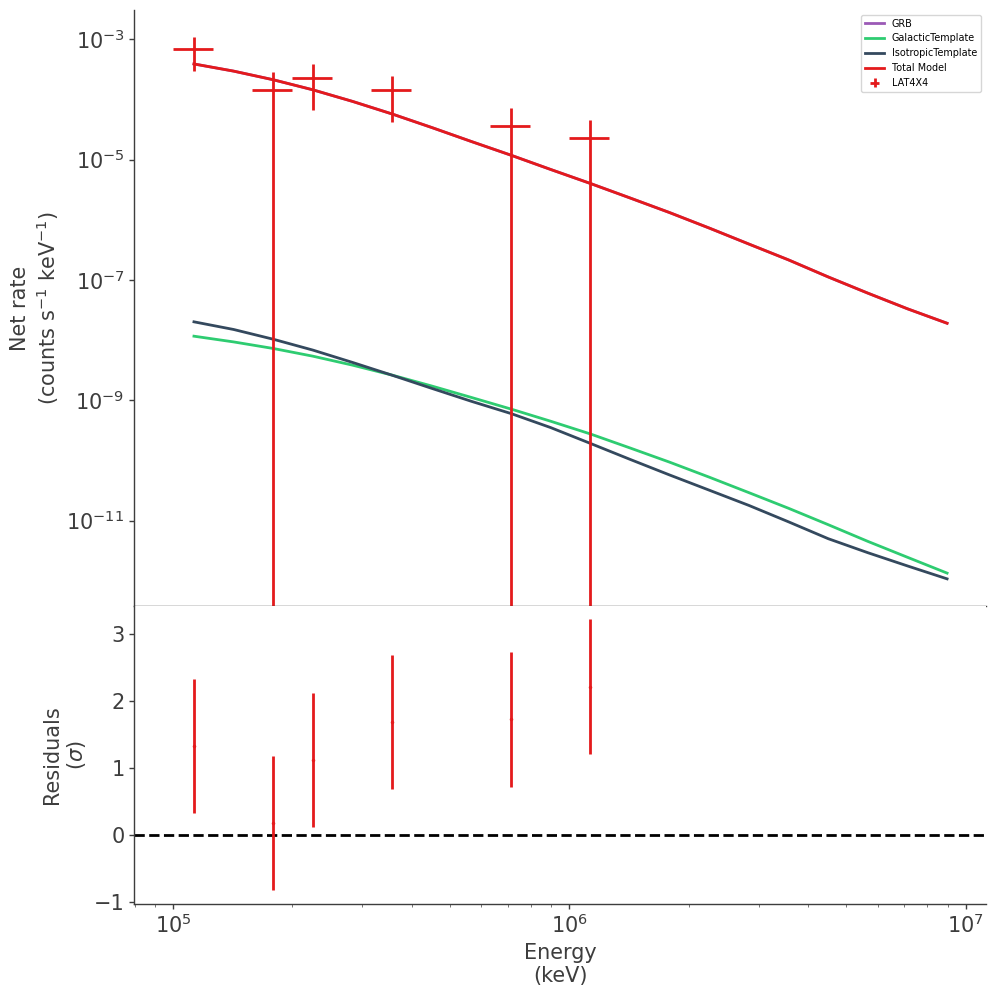

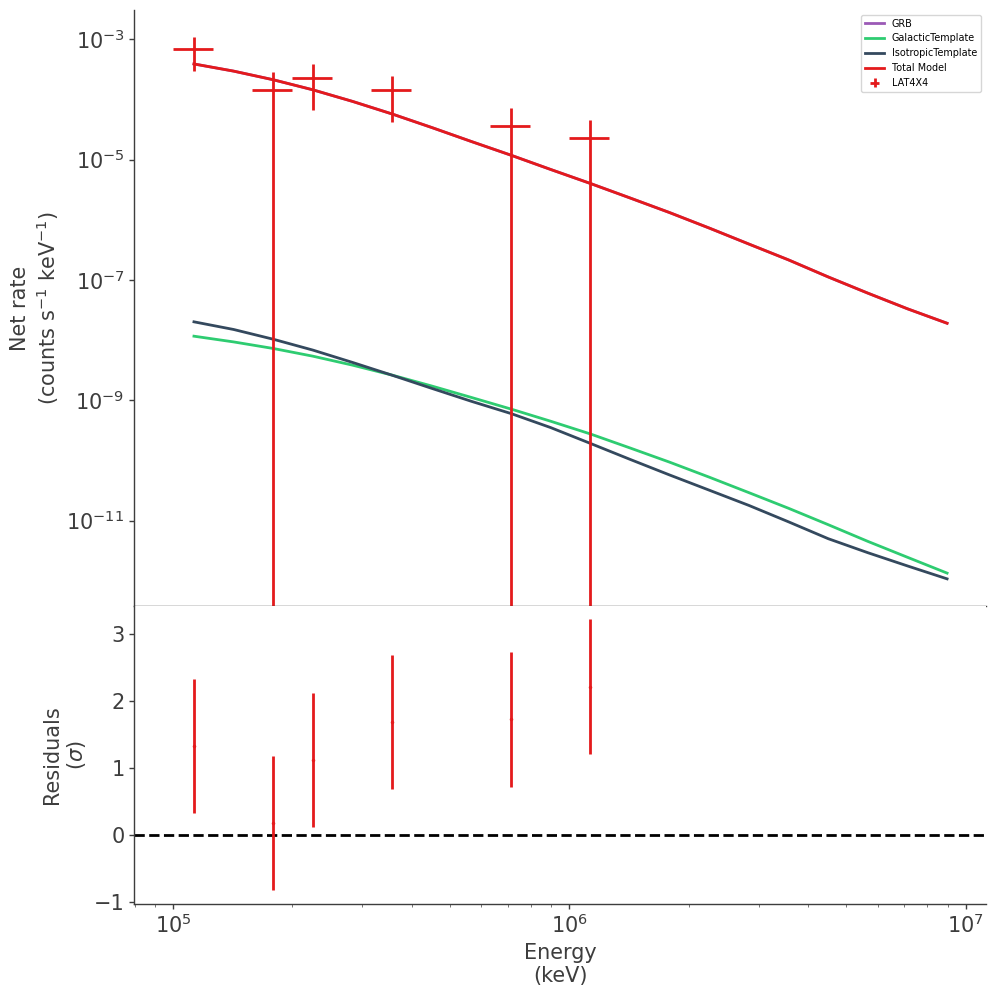

In [16]:
i = 3
T0, T1 = intervals[i], intervals[i + 1]
LAT_name = "LAT_%06.3f-%06.3f" % (T0, T1)
jl = results[LAT_name]
jl.results.display()
display_spectrum_model_counts(jl, step=False, figsize=(10, 10))

We can see the evolution of the spectrum with time (not all the bins are diplayed):


13:41:29 DEBUG     adding child ra                                                                  ]8;id=976161;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=993909;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=928877;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=279752;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=110392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=481019;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=917572;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=402028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=584824;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=760580;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=283582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=514324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=947834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=977332;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=905612;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=523406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=615420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=278278;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=455510;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=58025;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=381981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=970011;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=727037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=505049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=999886;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=723338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=423244;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=962658;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=480639;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=941702;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=91223;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=671626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=706749;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=792740;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=865889;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=553314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=606657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=696508;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=151684;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=664384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=162807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=973316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=824402;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=464831;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=599252;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=711894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=553553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=279978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_GalacticTemplate_Value                                       ]8;id=107028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=82678;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_GalacticTemplate_Value                                      ]8;id=323017;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=716451;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_IsotropicTemplate_Normalization                              ]8;id=125384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=78116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_IsotropicTemplate_Normalization                             ]8;id=284640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=915432;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=875783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=38991;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=401251;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=670343;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=402876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=331563;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=71634;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=77191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=957386;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=875800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=798703;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=4547;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=444262;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=188628;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=645122;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=578032;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=790839;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=801198;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=857345;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=979492;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=439287;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=886071;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=693510;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=495638;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=690279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=653540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=625470;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=763807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=945138;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=38130;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=802924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=47819;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=345271;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=619874;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=218263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=821869;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=998219;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=155019;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=357313;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=830488;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=475581;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=111544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=968346;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=118986;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=22710;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=680016;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=435335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=205818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_GalacticTemplate_Value                                       ]8;id=66859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=399863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_GalacticTemplate_Value                                      ]8;id=509197;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=931374;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_IsotropicTemplate_Normalization                              ]8;id=156388;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=202191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_IsotropicTemplate_Normalization                             ]8;id=730006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=943784;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=114625;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=391768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=708448;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=299721;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=449470;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=92908;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=615016;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=416229;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=499130;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=93759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=558918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=624812;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=590099;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=472891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=193595;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=305626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=194902;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=627940;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=123163;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=972044;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=90513;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=915365;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=844501;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=320939;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=245294;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=382395;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=676768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=38094;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=837111;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=17811;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=335518;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=118318;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=163635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=982683;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=879868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=526426;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=10400;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=900583;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=45210;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=492879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=867134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=276983;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=933588;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=94783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=869570;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=610300;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=908208;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=864613;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_GalacticTemplate_Value                                       ]8;id=74992;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=979662;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_GalacticTemplate_Value                                      ]8;id=304038;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=499328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_IsotropicTemplate_Normalization                              ]8;id=932559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=742575;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_IsotropicTemplate_Normalization                             ]8;id=331729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=270990;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=527910;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=103737;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=603726;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=721304;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=398510;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=448796;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=56241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=210774;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=439773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=211252;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=507143;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=352080;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=748047;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=231835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=557834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=522910;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=699810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=616835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=822952;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=754207;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=219981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=448907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=330602;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=273139;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=390204;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=384561;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=404699;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=834845;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=598779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=531831;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=971079;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=755029;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=193427;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=552544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=515752;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=406708;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=863937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=882479;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=643318;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=670133;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=718848;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=161047;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=356251;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=877281;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=122793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=491898;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=589579;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=242324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=2828;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=613844;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=492394;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=373956;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=964361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=773276;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=840245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=590926;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=857472;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=9162;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=893699;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=182447;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=438652;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=380587;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=509090;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=383152;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=368958;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=212605;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=197974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=403913;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=380008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=509748;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=153387;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=996270;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=565221;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=32612;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=808952;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=135508;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=28552;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=467379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=443558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=592391;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=722507;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=971637;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=620713;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=30451;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=226216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=933419;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=168813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=685351;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=968212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=700926;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=468802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=805753;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=130192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=499380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=298368;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=248362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=24562;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=261541;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=88453;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=617539;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=532286;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=62371;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=238985;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=743133;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_GalacticTemplate_Value                                       ]8;id=813855;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=871044;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_GalacticTemplate_Value                                      ]8;id=940331;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=600369;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_IsotropicTemplate_Normalization                              ]8;id=795257;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=785235;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_IsotropicTemplate_Normalization                             ]8;id=65797;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=478779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=61895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=839882;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=520238;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=721404;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=324258;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=679527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=267865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=2069;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=642000;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=376026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=969469;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=752312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

13:41:30 DEBUG     adding child index                                                               ]8;id=700054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=390297;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=585242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=586856;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=298892;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=255582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=782622;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=846728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=78066;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=475442;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=701973;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=684553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=210956;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=475766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=58638;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=826292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=579243;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=730049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=700974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=424691;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=448989;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=511494;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=55567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=785145;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=795888;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=421589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=681353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=624538;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=897289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=973688;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=724788;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=663382;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=651804;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=499783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=49978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=693548;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=694345;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=509509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=643950;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=508646;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=122493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=247692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=664227;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=218574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=687036;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=869118;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=355807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=292458;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=41863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=590438;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=715463;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=887960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=332845;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=438453;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=538198;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=802951;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=456233;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=510387;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=702093;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=704516;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=60937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=248972;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=421141;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=276212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=330192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=594389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=178277;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=647584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=89374;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=485510;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=956877;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=953523;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=544999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=252421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=486846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=970715;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=557517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=895823;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=682230;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=117833;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=174489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=621443;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=673388;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=80467;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=715317;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=912264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=945635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=517517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=239330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=578122;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=498738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=553110;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_GalacticTemplate_Value                                       ]8;id=346608;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=958362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_GalacticTemplate_Value                                      ]8;id=579039;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=181310;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_IsotropicTemplate_Normalization                              ]8;id=516663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=924554;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_IsotropicTemplate_Normalization                             ]8;id=344500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=228851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=960217;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=395264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=115927;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=458141;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=300062;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=810114;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=163342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=184335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=507732;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=197227;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=365499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=311489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=237158;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=919405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=93359;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=387059;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=764617;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=432523;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=837202;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=473024;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=515959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=376331;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=476224;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=257543;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=904453;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=554634;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=962679;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=963104;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=104463;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=512143;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=574419;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=933111;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=253823;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=711579;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=212392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=196464;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=89744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=871766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=927727;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=447761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=23113;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=646732;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=902872;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=829033;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=101652;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=705236;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=821385;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=744280;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_GalacticTemplate_Value                                       ]8;id=728225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=635080;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_GalacticTemplate_Value                                      ]8;id=213851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=428107;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_IsotropicTemplate_Normalization                              ]8;id=381630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=845773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_IsotropicTemplate_Normalization                             ]8;id=149553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=921030;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=280793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=44161;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=926025;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=165482;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=888682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=476021;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=797323;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=143900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=936373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=155417;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=915111;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=333017;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=907771;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=964010;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=548845;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=869846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=815242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=900532;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=671974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=508951;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=365112;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=100756;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=880060;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=706970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=281880;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=235146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=845227;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=336137;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=512847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=635324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=28458;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=39495;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=523881;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=217895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=190808;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=867845;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=38498;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=221015;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=950805;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=825470;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=700061;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=595721;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=121563;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=499178;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=337758;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=257514;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=24768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=605453;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_GalacticTemplate_Value                                     ]8;id=750050;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=629278;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_GalacticTemplate_Value                                    ]8;id=431705;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=585469;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_IsotropicTemplate_Normalization                            ]8;id=425979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=895368;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_IsotropicTemplate_Normalization                           ]8;id=800264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=983527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=645703;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=626207;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=282712;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=130633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=723751;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=669489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=746749;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=2542;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=876665;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=586617;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=44385;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=646956;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=705484;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=242569;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=819825;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=161589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=970878;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=375201;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=498381;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=788855;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=947620;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=654905;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=166264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=883227;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=822447;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=902076;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=509101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=563373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=700465;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=549715;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=311922;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=169879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=36388;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=807705;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=382228;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=269422;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=824029;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=823524;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=436362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=793064;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=618149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=468778;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=544820;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=831242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=4043;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=733942;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=421453;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=291764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_GalacticTemplate_Value                                     ]8;id=863074;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=25310;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_GalacticTemplate_Value                                    ]8;id=719412;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=352448;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_IsotropicTemplate_Normalization                            ]8;id=666834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=768334;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_IsotropicTemplate_Normalization                           ]8;id=48135;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=472325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=88036;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=977636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=107819;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=130636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=690362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=823077;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=112994;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=607500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=947135;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=609618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=417694;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=271871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=755695;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=547357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=70663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=285370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=473341;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=644744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=107236;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=769848;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=911341;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=562509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=350596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=131580;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=263909;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=236194;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=523710;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=86972;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=200478;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=657128;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=896270;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=66018;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=704137;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=108969;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=16340;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=426030;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=415794;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=259506;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=912917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=934323;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=802046;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=693184;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=247993;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=426047;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=141857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=954930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=158854;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=827980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_GalacticTemplate_Value                                     ]8;id=77930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=453147;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_GalacticTemplate_Value                                    ]8;id=297236;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=186747;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_IsotropicTemplate_Normalization                            ]8;id=563744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=467062;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_IsotropicTemplate_Normalization                           ]8;id=653373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=31871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=643313;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=227043;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=43392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=281209;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=884277;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=146103;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=105793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=402351;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=184675;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=423206;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=940161;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=833353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=298859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=386813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=631453;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=648120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=978741;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=770598;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=238278;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=88771;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=674536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=882068;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=334389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=871822;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=809954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=716586;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=814600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=813682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=620434;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=363342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=217025;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=39722;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=894920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=446769;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=198037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=703869;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=13416;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=679393;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=76528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=259500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=429958;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=831617;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=858210;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=646856;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=513865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=922227;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=30507;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=173822;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_GalacticTemplate_Value                                     ]8;id=248953;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=825679;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_GalacticTemplate_Value                                    ]8;id=495531;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=470414;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_IsotropicTemplate_Normalization                            ]8;id=383725;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=384384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_IsotropicTemplate_Normalization                           ]8;id=427717;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=632864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=754815;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=507681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=82909;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=458040;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=419691;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=671769;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=638565;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=841727;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=375810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=172716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=84195;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=699987;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=265678;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=330602;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=914384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=433469;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=839936;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=380957;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=492987;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=612138;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=163908;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=138660;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=665128;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=328918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=913755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=422058;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=740219;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=675976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=464655;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=698635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=701287;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=321792;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=619414;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=73120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=785765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=129719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=925680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=390186;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=907537;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=214719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=406152;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=50104;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=606353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=885392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=461594;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=602076;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=297546;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=556704;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_GalacticTemplate_Value                                    ]8;id=324296;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=992616;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_GalacticTemplate_Value                                   ]8;id=28821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=496995;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_IsotropicTemplate_Normalization                           ]8;id=203965;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=765303;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_IsotropicTemplate_Normalization                          ]8;id=201128;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=495727;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

processing MLE analyses:   0%|          | 0/13 [00:00<?, ?it/s]

         DEBUG     adding child ra                                                                  ]8;id=85106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=492335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=918914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=727530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=664771;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=509479;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=42097;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=257215;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=544981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=486219;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=920717;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=29302;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=630677;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=215387;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=76360;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=973210;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=543311;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=333146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=460907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=165148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=519033;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=37694;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=987284;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=877281;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=872231;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=843409;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=318150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=835727;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=645037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=87888;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

13:41:31 DEBUG     path is now: main.polarization                                                  ]8;id=375564;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=67898;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=482373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=183156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=845540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=582416;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=896988;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=489331;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=468282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=228223;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=434830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=43992;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=393608;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=993297;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=820467;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=84302;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=661298;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=778790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_GalacticTemplate_Value                                       ]8;id=337099;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=248922;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_GalacticTemplate_Value                                      ]8;id=241292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=647442;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_IsotropicTemplate_Normalization                              ]8;id=390007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=281402;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_IsotropicTemplate_Normalization                             ]8;id=114277;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=954193;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

13:41:42 DEBUG     adding child ra                                                                  ]8;id=636053;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=616715;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=884546;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=53059;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=350093;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=89187;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=515061;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=113943;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=295668;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=255378;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=556519;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=833645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=142147;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=436812;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=411044;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=654054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=702587;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=490856;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=988754;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=930642;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=932526;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=217242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=223247;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=76817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=454721;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=202454;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=680861;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=12095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=128556;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=355880;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=37877;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=241578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=403596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=161835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=385515;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=688947;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=329034;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=313586;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=765007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=38098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=443507;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=418894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=609726;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=287078;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=444895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=913416;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=740243;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=158870;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_GalacticTemplate_Value                                       ]8;id=661742;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=278743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_GalacticTemplate_Value                                      ]8;id=250650;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=573744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_IsotropicTemplate_Normalization                              ]8;id=115188;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=489881;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_IsotropicTemplate_Normalization                             ]8;id=621785;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=140951;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

13:41:53 DEBUG     adding child ra                                                                  ]8;id=458722;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=245701;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=335751;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=653020;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=718941;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=514125;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=109830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=820495;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=831732;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=294733;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=81889;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=829393;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=972161;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=579619;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=38885;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=866268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=746679;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=76124;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=726717;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=664895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=758982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=914127;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=9873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=704588;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=493663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=598192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=111320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=709565;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=546325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=317680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=748430;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=249996;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=152735;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=537149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=843101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=142859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=914242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=55543;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=12918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=132192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=42466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=654841;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=293908;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=618710;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=922344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=698020;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=879947;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=927619;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_GalacticTemplate_Value                                       ]8;id=488101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=276830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_GalacticTemplate_Value                                      ]8;id=157239;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=570667;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_IsotropicTemplate_Normalization                              ]8;id=975810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=988984;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_IsotropicTemplate_Normalization                             ]8;id=571650;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=919300;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

13:42:15 DEBUG     adding child ra                                                                  ]8;id=421510;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=488862;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=825838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=694671;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=915432;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=229606;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=272758;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=643798;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=318775;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=917508;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=734151;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=879197;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=167387;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=885976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=321091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=110792;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=997074;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=202357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=147156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=660186;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=172289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=760327;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=27410;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=342877;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=868052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=596611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=847226;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=91244;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=971058;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=134368;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=852986;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=109643;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=998615;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=782663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=704469;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=234032;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=73324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=114908;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=799770;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=480485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=748740;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=614786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=416728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=557028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=205635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=487640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=779718;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=985992;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=64620;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=944322;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=107882;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=607379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=852286;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=632353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=289298;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=959599;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

13:42:36 DEBUG     adding child ra                                                                  ]8;id=862075;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=57629;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=453641;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=253580;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=198460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=309835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=11774;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=272234;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=598903;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=655240;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=37728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=210373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=770251;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=786195;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=447528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=663538;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=269963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=788282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=353609;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=873428;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=75261;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=344080;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=616034;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=585064;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=576276;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=803159;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=750910;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=646280;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=869173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=213406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=118633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=658306;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=50519;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=623558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=729175;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=604307;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=116548;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=746289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=352696;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=676823;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=513608;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=80830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=851080;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=362712;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=191797;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=303391;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=408280;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=911091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_GalacticTemplate_Value                                       ]8;id=962676;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=552463;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_GalacticTemplate_Value                                      ]8;id=946164;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=777802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_IsotropicTemplate_Normalization                              ]8;id=426979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=169005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_IsotropicTemplate_Normalization                             ]8;id=863127;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=842962;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

13:42:58 DEBUG     adding child ra                                                                  ]8;id=947854;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=827781;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=593597;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=690416;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=652882;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=647056;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=850831;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=862876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=514542;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=794349;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=268087;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=288007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=902245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=73885;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=407217;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=745416;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=244719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=413845;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=662612;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=320874;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=226724;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=695748;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=889576;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=865770;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=492597;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=800764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=512308;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=328801;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=381183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=55663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=353565;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=876204;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=134655;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=38420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=130750;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=132616;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=89943;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=644160;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=194679;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=715282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=628608;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=241504;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=897316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=405684;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=408617;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=770638;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=624810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=670381;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=288279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=451276;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=977156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=628049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=494150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=977651;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=702866;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=481349;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

13:43:21 DEBUG     adding child ra                                                                  ]8;id=850938;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=622720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=730758;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=491151;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=167553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=49830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=890194;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=107192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=220038;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=869991;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=201091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=67676;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=232162;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=197365;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=732121;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=18037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=937387;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=925798;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=939673;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=699192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=261180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=962800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=410967;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=3976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=33789;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=723026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=514729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=170284;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=809392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=530582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=31199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=268391;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=902540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=649944;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=935545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=228120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=424734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=790269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=249826;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=931012;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=869491;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=948148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=650518;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=528131;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=649124;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=378881;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=291023;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=659580;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_GalacticTemplate_Value                                       ]8;id=239286;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=239780;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_GalacticTemplate_Value                                      ]8;id=771985;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=41805;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_IsotropicTemplate_Normalization                              ]8;id=818661;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=748759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_IsotropicTemplate_Normalization                             ]8;id=362398;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=211673;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

13:43:38 DEBUG     adding child ra                                                                  ]8;id=290649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=584531;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=363251;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=290123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=846067;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=37337;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=746635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=906463;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=385515;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=947917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=205401;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=522681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=349537;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=381428;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=526978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=180734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=697548;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=551749;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=974415;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=95091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=280964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=130123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=717745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=589353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=53900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=448831;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=68026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=86912;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=573103;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=340982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=65471;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=198738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=751942;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=799840;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=66035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=680909;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=175426;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=71030;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=5381;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=930544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=93948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=955918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=814452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=610979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=858192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=603044;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=208501;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=294984;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_GalacticTemplate_Value                                       ]8;id=479227;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=373862;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_GalacticTemplate_Value                                      ]8;id=843057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=406043;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_IsotropicTemplate_Normalization                              ]8;id=309873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=838027;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_IsotropicTemplate_Normalization                             ]8;id=122427;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=177845;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

13:44:00 DEBUG     adding child ra                                                                  ]8;id=679642;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=645647;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=745966;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=125516;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=719547;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=866527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=47859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=546542;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=351209;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=687253;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=31480;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=31468;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=181842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=191024;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=145599;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=772911;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=177262;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=317677;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=749240;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=488419;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=30976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=208686;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=253243;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=515909;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=169968;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=55653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=820962;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=373559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=468063;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=985751;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=141420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=21159;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=918098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=286706;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=230761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=15168;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=522828;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=608551;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=190254;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=572319;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=588180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=113341;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=373772;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=122367;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=621091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=695571;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=13810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=638330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_GalacticTemplate_Value                                     ]8;id=978420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=582161;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_GalacticTemplate_Value                                    ]8;id=492042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=708205;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_IsotropicTemplate_Normalization                            ]8;id=488249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=274851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_IsotropicTemplate_Normalization                           ]8;id=310432;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=776127;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

13:44:21 DEBUG     adding child ra                                                                  ]8;id=407211;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=249214;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=426933;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=515904;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=198555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=371766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=416245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=786691;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=994843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=384078;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=905565;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=723839;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=690339;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=767301;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=431968;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=547106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=775251;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=626342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=592381;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=360722;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=401374;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=824796;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=645010;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=521031;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=979619;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=352618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=394857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=503503;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=779428;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=214555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=246013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=418377;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=174189;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=423490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=270946;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=334082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=583959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=757719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=980850;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=867779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=765569;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=610891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=783413;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=22117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=554855;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=167821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=72572;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=74314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_GalacticTemplate_Value                                     ]8;id=26397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=603035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_GalacticTemplate_Value                                    ]8;id=844219;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=15035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_IsotropicTemplate_Normalization                            ]8;id=266407;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=915261;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_IsotropicTemplate_Normalization                           ]8;id=416289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=579593;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

13:44:45 DEBUG     adding child ra                                                                  ]8;id=363832;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=724113;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=598449;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=878546;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=393850;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=623004;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=296424;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=774893;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=60405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=37483;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=557986;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=395209;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=954227;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=680717;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=950768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=542877;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=796371;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=853323;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=909955;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=164308;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=328034;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=274415;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=16263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=928799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=675271;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=729041;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=79896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=971478;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=723388;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=606445;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=30210;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=405517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=657376;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=679938;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=190700;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=161037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=231400;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=562800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=1035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=263954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=184596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=185387;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=173258;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=388096;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=296708;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=104129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=312312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=446181;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_GalacticTemplate_Value                                     ]8;id=931361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=356167;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_GalacticTemplate_Value                                    ]8;id=685577;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=501981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_IsotropicTemplate_Normalization                            ]8;id=75062;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=898448;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_IsotropicTemplate_Normalization                           ]8;id=51781;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=591096;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

13:45:07 DEBUG     adding child ra                                                                  ]8;id=375853;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=453663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=688157;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=932183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=160248;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=604040;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=202225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=970450;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=218841;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=218117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=868566;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=973489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=648574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=756450;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=326621;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=608106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=792984;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=805396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=2116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=101684;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=214151;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=192773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=239671;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=847478;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=88704;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=711784;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=457654;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=896109;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=121407;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=189146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=554253;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=282985;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=26138;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=835777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=824634;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=129609;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=979251;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=173099;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=1096;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=640838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=821755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=637052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=836279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=333628;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=951307;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=573062;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=609205;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=122919;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_GalacticTemplate_Value                                     ]8;id=200936;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=471395;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_GalacticTemplate_Value                                    ]8;id=50190;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=115780;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_IsotropicTemplate_Normalization                            ]8;id=259503;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=719977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_IsotropicTemplate_Normalization                           ]8;id=621078;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=790062;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

13:45:29 DEBUG     adding child ra                                                                  ]8;id=3685;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=938521;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=362433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=584944;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=71967;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=138575;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=535788;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=538627;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=277013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=510449;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=107814;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=907430;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=50327;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=228928;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=141222;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=20107;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=596203;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=316608;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=352173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=325608;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=760966;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=388007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=152696;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=190107;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=115042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=552700;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=273156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=159208;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=682978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=79837;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=178315;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=50581;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=729172;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=205624;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=418461;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=526704;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=421425;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=486817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=982325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=998536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=565728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=302143;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=355255;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=362410;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=996419;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=587936;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=942529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=441670;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_GalacticTemplate_Value                                    ]8;id=718221;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=894641;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_GalacticTemplate_Value                                   ]8;id=817834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=116935;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_IsotropicTemplate_Normalization                           ]8;id=461379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=396796;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_IsotropicTemplate_Normalization                          ]8;id=319249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=803743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

13:45:51 DEBUG     converting MeV to MeV                                                          ]8;id=738048;file:///Users/runner/work/threeML/threeML/threeML/io/plotting/model_plot.py\model_plot.py]8;;\:]8;id=938242;file:///Users/runner/work/threeML/threeML/threeML/io/plotting/model_plot.py#848\848]8;;\

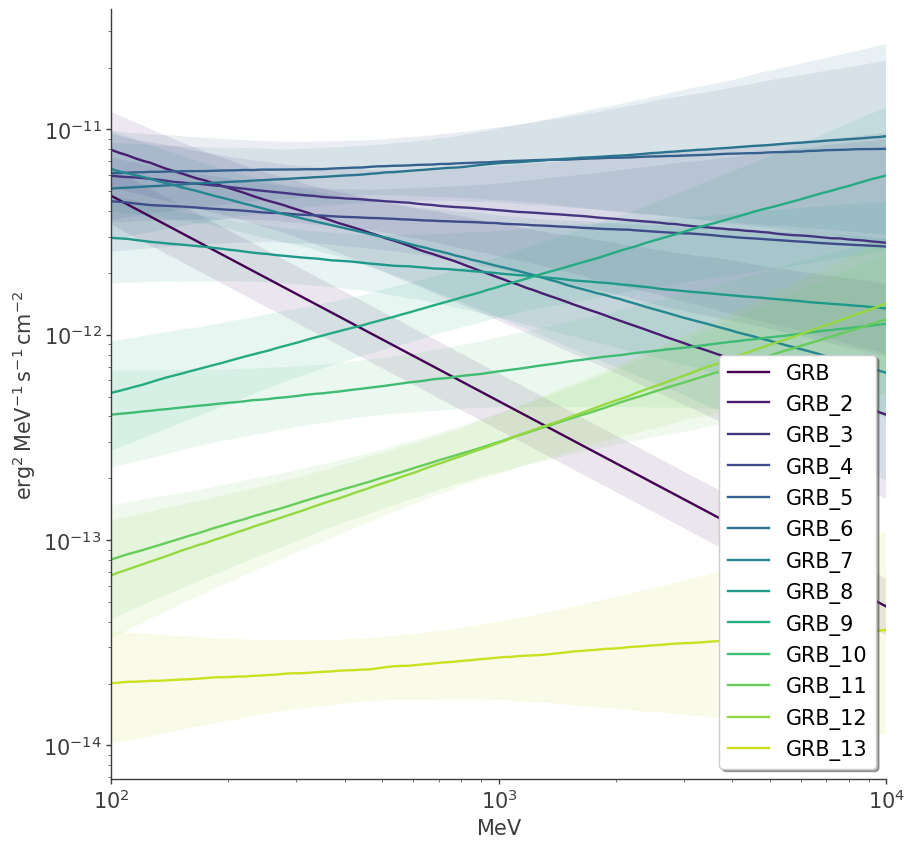

In [17]:
fig = plot_spectra(
    *[results[k].results for k in list(results.keys())[::2]],
    ene_min=100 * u.MeV,
    ene_max=10 * u.GeV,
    flux_unit="erg2/(cm2 s MeV)",
    energy_unit="MeV",
    fit_cmap="viridis",
    contour_cmap="viridis",
    contour_style_kwargs=dict(alpha=0.1)
)
fig.set_size_inches(10, 10)

Finally, we can display flux lightcurves and index evolution with time.


13:45:53 DEBUG     adding child ra                                                                  ]8;id=508174;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=660481;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=164347;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=352628;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=299816;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=761595;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=417238;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=664900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=851925;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=707592;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=616013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=731732;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=80821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=545105;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=158463;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=517069;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=552947;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=425916;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=708710;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=55774;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=843830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=883710;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=90790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=409868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=522254;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=158474;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=628505;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=721659;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=73526;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=361029;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=379536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=140785;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=491821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=418344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=736664;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=704768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=417238;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=45643;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=951651;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=391188;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=339092;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=577994;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=440468;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=891325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=175133;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=57721;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=873112;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=492374;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_GalacticTemplate_Value                                       ]8;id=812574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=550121;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_GalacticTemplate_Value                                      ]8;id=606214;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=214415;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_IsotropicTemplate_Normalization                              ]8;id=72918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=612979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_IsotropicTemplate_Normalization                             ]8;id=878135;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=518911;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=834141;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=371865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=899090;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=453328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=201141;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=264370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=104914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=770287;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=666980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=546305;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=509923;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=265025;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=171626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=287644;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=582854;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=601808;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=50985;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=232075;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=852781;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=372691;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=437458;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=22703;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=239464;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=803594;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=778924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=597605;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=963571;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=583904;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=442408;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=48491;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=135629;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=432652;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=244636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=143915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=499807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=512894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=937561;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=553399;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=816589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=839048;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=187975;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=800920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=901103;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=93658;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=792132;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=511810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=267063;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=734292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X3_GalacticTemplate_Value                                       ]8;id=436031;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=835694;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X3_GalacticTemplate_Value                                      ]8;id=995030;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=290997;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X3_IsotropicTemplate_Normalization                              ]8;id=608819;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=256282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X3_IsotropicTemplate_Normalization                             ]8;id=993814;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=352929;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=533711;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=855165;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=358393;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=754117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=347743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=363262;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=624994;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=753828;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=650557;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=618472;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=580938;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=356816;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=92372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=575897;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=636431;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=515943;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=147496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=365688;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=184032;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=303029;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=88868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=693684;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=470001;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=670133;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=82967;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=785254;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=789952;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=545794;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=604583;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=636572;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=352377;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=656108;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=387982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=511471;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=975156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=870563;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=514618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=374304;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=732766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=187443;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=214905;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=327177;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=896341;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=905643;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=513918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=150389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=587500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=579395;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_GalacticTemplate_Value                                       ]8;id=225696;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=866846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_GalacticTemplate_Value                                      ]8;id=470181;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=905473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_IsotropicTemplate_Normalization                              ]8;id=743780;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=790704;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_IsotropicTemplate_Normalization                             ]8;id=438139;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=157644;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=718077;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=985242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=573985;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=721452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=727446;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=586248;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=854636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=427084;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=536848;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=10449;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=900035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=324538;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=273351;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=896141;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=455843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=976773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=257136;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=66737;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=873291;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=394266;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=715170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=354052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=297489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=523532;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=72365;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=854600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=123090;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=666573;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=751193;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=273968;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=696372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=622983;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=194851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=749311;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=263107;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=542671;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=941719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=255997;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=558013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=43857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=355831;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=784692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=379217;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=933084;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=653516;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=672293;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=866866;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=415957;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X4_GalacticTemplate_Value                                       ]8;id=988079;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=409885;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X4_GalacticTemplate_Value                                      ]8;id=815874;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=320774;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X4_IsotropicTemplate_Normalization                              ]8;id=152805;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=101689;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X4_IsotropicTemplate_Normalization                             ]8;id=813846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=968010;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=106509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=130625;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=578691;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=712107;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=212051;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=878088;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=580015;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=91032;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=464939;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=984931;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=57749;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=232590;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=952212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=812063;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=500032;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=833129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=264808;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=311264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=900091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=45226;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=702832;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=412525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=225701;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=685934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=901731;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=12517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=171340;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=90614;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=378540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=912849;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=719640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=401209;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=923271;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=461377;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=894717;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=429591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=388456;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=419133;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=662749;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=138574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=748048;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=289996;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=108056;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=297085;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=837483;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=581483;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=611998;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=791355;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_GalacticTemplate_Value                                       ]8;id=906178;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=25032;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_GalacticTemplate_Value                                      ]8;id=338231;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=271744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_IsotropicTemplate_Normalization                              ]8;id=318738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=811903;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_IsotropicTemplate_Normalization                             ]8;id=204265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=361506;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=357556;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=352965;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=459470;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=111876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=667327;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=759116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=381653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=722829;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=98226;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=819833;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=896587;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=249556;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=350405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=333311;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=210200;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=610947;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=610183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=113448;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=896546;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=995917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=358368;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=47718;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=680394;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=670215;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=248975;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=444425;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=940002;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=961951;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=601647;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=969206;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=567832;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=304201;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=242867;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=692232;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=126441;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=890776;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=417177;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=300986;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=409173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=700794;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=185054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=870900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=685199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=94917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=767883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=397948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=176226;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=289104;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=398920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=166674;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=199708;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=56638;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=321638;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=323163;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=56802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=647781;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=483745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=639953;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=72098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=28063;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=511735;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=887354;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=86603;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=953269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=594279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=848427;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=833241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=100487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=973954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=798753;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=728891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=500252;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=977334;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=929329;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=386474;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=114393;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=437817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=614589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=227288;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=850625;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=755799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=85826;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=348840;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=286415;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=330768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=28841;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=489410;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=402459;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=301647;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=402274;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=939307;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=124646;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=991082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=761900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=596498;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=346689;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=735634;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=438533;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=189093;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=958517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=331892;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=296189;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=906387;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=351746;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=649935;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=695850;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=489357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=736259;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=861867;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=539111;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=719051;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=447486;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=16855;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=631508;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=881053;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=526022;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=231109;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=767536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=381358;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=72812;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=473986;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=52207;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=92234;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=783053;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=400334;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=343353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=491511;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=675804;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=143634;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=926950;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=732530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=952164;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=103589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=179876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=712278;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=424314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=695169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=807994;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=201501;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=287631;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=127472;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=244007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=670921;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=673942;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=649909;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=401872;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=370000;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=607891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=227591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=816489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=701477;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=846970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=264838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=554072;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=887881;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=421272;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=88700;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=704389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=328632;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=558047;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X6_GalacticTemplate_Value                                       ]8;id=580396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=236883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X6_GalacticTemplate_Value                                      ]8;id=657815;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=803197;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X6_IsotropicTemplate_Normalization                              ]8;id=9167;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=868705;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X6_IsotropicTemplate_Normalization                             ]8;id=314334;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=838231;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=488893;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=459805;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=653166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=675270;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=723252;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=268584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=140565;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=644566;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=364226;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=477776;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=586648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=998851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=422572;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=274574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=383348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=911896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=954053;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=844328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=130494;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=517853;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=726122;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=170158;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=1329;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=104203;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=617788;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=304089;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=125718;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=152529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=274114;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=605026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

13:45:54 DEBUG     path is now: main.polarization                                                  ]8;id=482942;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=712845;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=176954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=824762;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=948875;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=121823;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=671361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=45633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=702370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=869471;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=663972;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=426474;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=546648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=418112;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=758199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=516264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=55738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=389882;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_GalacticTemplate_Value                                       ]8;id=286258;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=202576;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_GalacticTemplate_Value                                      ]8;id=972654;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=178219;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_IsotropicTemplate_Normalization                              ]8;id=814633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=467483;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_IsotropicTemplate_Normalization                             ]8;id=424223;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=595103;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=89227;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=522348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=763571;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=168897;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=857359;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=41120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=64158;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=297005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=589189;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=916320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=926648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=972614;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=41274;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=327645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=862774;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=590538;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=17975;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=211889;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=754310;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=101570;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=915754;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=625328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=212202;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=781661;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=973715;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=334906;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=282537;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=244803;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=765206;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=775564;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=133558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=532583;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=519529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=261584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=774260;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=421590;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=987027;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=279378;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=115464;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=176070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=139535;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=976807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=506675;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=893540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=461676;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=303977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=22203;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=690224;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X7_GalacticTemplate_Value                                       ]8;id=194233;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=114476;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X7_GalacticTemplate_Value                                      ]8;id=710814;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=221094;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X7_IsotropicTemplate_Normalization                              ]8;id=302657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=991985;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X7_IsotropicTemplate_Normalization                             ]8;id=562218;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=784616;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=305462;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=704165;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=271638;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=592543;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=336642;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=210405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=59950;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=876836;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=205064;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=509502;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=536991;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=146959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=693837;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=323609;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=330058;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=714786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=131783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=109952;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=136227;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=432224;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=25818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=316145;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=392390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=508838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=693167;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=119005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=474221;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=410601;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=184531;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=166070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=109339;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=112725;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=940923;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=558250;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=817482;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=525564;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=543560;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=961274;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=243118;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=527004;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=167900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=452051;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=836361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=347434;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=395627;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=959891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=838272;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=425017;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=572821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=794472;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=685730;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=802191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=164344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=928754;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=254316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=710186;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=739192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=978485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=280526;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=898018;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=915163;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=383894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=728626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=514873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=757962;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=996958;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=223808;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=260830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=326069;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=432621;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=684529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=429909;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=904886;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=456612;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=707083;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=254949;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=339173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=920246;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=6988;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=938958;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=269200;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=242496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=774098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=498444;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=543362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=729192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=776716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=538261;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=497795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=244144;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=320868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=922186;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=734444;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=646636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=904943;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=545949;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=307049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=354693;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=514600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=383532;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=23135;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=222385;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=990773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=63870;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=299639;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=280243;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=13530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=499652;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=586898;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=76489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=729341;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=269023;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=273306;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=787001;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=134198;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=947394;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=699729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=800326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=535300;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=979550;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=782854;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=261963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=545791;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=975410;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=177026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=258225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=11873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=571376;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=323952;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=479088;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=56316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=884044;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=339058;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=13841;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=630578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=168267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=848683;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=724412;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=1649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=457312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=254740;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=726394;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=215553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=226292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=782346;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=126006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=744963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=979726;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=819696;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=33015;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=15275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=277545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=800197;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=298498;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=533028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=786555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=843213;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=903792;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=781779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_GalacticTemplate_Value                                       ]8;id=256130;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=727948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_GalacticTemplate_Value                                      ]8;id=786078;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=926176;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_IsotropicTemplate_Normalization                              ]8;id=866803;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=762739;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_IsotropicTemplate_Normalization                             ]8;id=388403;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=456681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=986956;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=945438;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=299048;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=212072;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=879277;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=638419;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=230419;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=80726;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=902235;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=41276;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=170000;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=486375;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=158416;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=694819;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=395572;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=798203;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=264142;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=411266;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=119558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=71304;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=407333;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=201321;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=18325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=50981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=436110;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=201414;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=693802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=245164;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=692476;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=290160;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=90435;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=171399;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=268925;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=228183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=685132;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=924913;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=896331;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=284236;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=651471;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=917993;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=89314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=931711;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=45762;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=872967;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=921180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=497338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=470561;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=737365;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X8_GalacticTemplate_Value                                       ]8;id=75822;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=421357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X8_GalacticTemplate_Value                                      ]8;id=732611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=215878;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X8_IsotropicTemplate_Normalization                              ]8;id=140519;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=304261;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X8_IsotropicTemplate_Normalization                             ]8;id=849756;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=912375;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=190503;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=408585;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=769943;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=344959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=76674;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=566592;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=586163;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=271283;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=763225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=495701;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=915666;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=296916;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=887242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=485280;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=228558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=70120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=486824;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=89572;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=864579;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=455363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=294408;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=166941;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=663960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=722844;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=321219;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=542356;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=494786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=525788;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=883941;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=113335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=37918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=338930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=9604;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=500694;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=100069;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=186456;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=954039;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=755049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=940030;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=347361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=543576;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=325791;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=147345;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=311553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=753621;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=525105;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=617674;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=734872;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_GalacticTemplate_Value                                       ]8;id=141756;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=498169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_GalacticTemplate_Value                                      ]8;id=772538;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=773249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_IsotropicTemplate_Normalization                              ]8;id=616080;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=351780;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_IsotropicTemplate_Normalization                             ]8;id=286823;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=433160;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=614237;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=321703;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=885883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=906065;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=548474;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=800980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=860913;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=314868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=197612;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=75367;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=851062;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=324534;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=676051;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=326255;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=51007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=544415;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=453855;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=367087;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=382128;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=460149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=272635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=696307;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=670206;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=658715;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=596774;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=968513;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=873307;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=470930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=784568;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=215129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=257155;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=702985;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=588918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=635717;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=922879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=379725;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=588324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=75037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=128955;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=774881;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=996966;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=13392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=83227;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=127161;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=905842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=530368;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=870789;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=968176;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT9X10_GalacticTemplate_Value                                      ]8;id=139166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=379467;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT9X10_GalacticTemplate_Value                                     ]8;id=932851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=586243;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT9X10_IsotropicTemplate_Normalization                             ]8;id=737876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=788939;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT9X10_IsotropicTemplate_Normalization                            ]8;id=819628;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=219082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=345135;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=652916;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=92636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=644509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=77376;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=688789;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=732613;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=8848;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=270120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=905303;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=679700;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=571547;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=334217;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=989815;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=65778;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=509089;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=839372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=92625;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=66938;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=910250;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=619692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=576395;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=225414;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=939042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=115115;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=313836;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=70361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=259799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=720303;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=550259;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=10703;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=312051;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=12241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=930723;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=718489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=728006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=510530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=788881;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=773577;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=512280;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=668654;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=642722;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=372584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=751944;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=890906;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=469416;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=921217;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=975961;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_GalacticTemplate_Value                                     ]8;id=43689;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=817078;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_GalacticTemplate_Value                                    ]8;id=256207;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=531156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_IsotropicTemplate_Normalization                            ]8;id=392271;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=53509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_IsotropicTemplate_Normalization                           ]8;id=769987;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=272758;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=324946;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=503784;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=138132;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=429825;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=538498;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=870959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=422739;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=240935;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=278260;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=726452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=627788;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=443116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=283833;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=214183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=696099;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=521987;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=118360;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=955040;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=281962;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=243383;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=779200;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=65722;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=203341;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=27429;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=148370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=325917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=236285;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=349103;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=265042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=337703;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=648197;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=682634;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=526111;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=436234;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=184653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=124664;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=270292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=499178;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=481480;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=725374;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=22710;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=374383;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=25120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=995697;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=375734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=960257;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=941762;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=246219;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT12X14_GalacticTemplate_Value                                     ]8;id=6455;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=674532;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT12X14_GalacticTemplate_Value                                    ]8;id=834622;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=890278;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT12X14_IsotropicTemplate_Normalization                            ]8;id=852164;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=392768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT12X14_IsotropicTemplate_Normalization                           ]8;id=523518;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=478949;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=929034;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=553618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=507542;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=810473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=836249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=795655;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=375830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=612419;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=843951;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=69544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=686422;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=906686;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=114119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=593832;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=715534;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=311133;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=36313;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=501723;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=109967;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=218593;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=971719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=629064;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=490445;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=644788;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=605732;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=473168;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=851512;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=189865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=438816;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=327476;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=128143;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=878763;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=311034;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=653586;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=878689;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=331415;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=640833;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=212471;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=624490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=581345;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=759489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=262144;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=795686;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=92818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=584245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=843209;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=148103;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=311881;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_GalacticTemplate_Value                                     ]8;id=335299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=772342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_GalacticTemplate_Value                                    ]8;id=855948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=716520;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_IsotropicTemplate_Normalization                            ]8;id=523273;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=374358;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_IsotropicTemplate_Normalization                           ]8;id=568773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=225638;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=443837;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=413174;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=443622;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=458648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=215189;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=48969;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=555823;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=701954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=464162;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=355870;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=258045;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=857714;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=432419;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=950201;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=134130;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=92376;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=199767;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=308752;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=205127;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=212829;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=328245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=839723;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=836495;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=640383;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=887430;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=903010;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=737350;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=950764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=830550;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=339309;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=69044;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=272888;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=721123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=969140;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

13:45:55 DEBUG     path is now: GRB.position                                                       ]8;id=198535;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=376168;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=369354;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=759497;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=65727;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=385017;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=95774;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=928535;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=242709;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=577881;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=930794;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=667943;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=71911;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=571676;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT17X21_GalacticTemplate_Value                                     ]8;id=38113;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=257405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT17X21_GalacticTemplate_Value                                    ]8;id=392199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=158214;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT17X21_IsotropicTemplate_Normalization                            ]8;id=353347;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=855707;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT17X21_IsotropicTemplate_Normalization                           ]8;id=874032;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=853564;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=672797;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=442279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=300009;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=108441;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=871716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=550153;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=123020;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=412325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=39304;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=991926;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=139108;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=621209;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=620042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=825513;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=130179;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=81731;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=498179;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=124785;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=865798;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=389229;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=563682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=461141;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=144511;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=376430;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=452855;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=143455;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=239774;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=763772;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=881679;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=609559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=820575;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=650803;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=755069;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=677580;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=973097;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=373881;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=561168;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=368518;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=299857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=26070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=715716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=490143;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=253342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=886741;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=777177;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=340366;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=528333;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=560194;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_GalacticTemplate_Value                                     ]8;id=956446;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=194299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_GalacticTemplate_Value                                    ]8;id=603722;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=678869;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_IsotropicTemplate_Normalization                            ]8;id=776473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=540505;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_IsotropicTemplate_Normalization                           ]8;id=981902;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=770819;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=589936;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=195425;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=893303;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=180676;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=764632;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=648947;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=591875;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=396599;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=269289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=392945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=4439;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=426943;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=317816;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=852989;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=98313;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=525087;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=176174;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=395491;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=725588;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=59923;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=392211;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=225033;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=621492;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=287910;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=208337;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=858505;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=836267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=495020;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=406761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=516062;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=272185;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=764082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=512517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=965100;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=516010;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=827960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=499946;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=444742;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=311246;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=726103;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=320112;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=990365;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=896162;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=38525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=707047;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=741048;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=505504;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=805147;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT30X40_GalacticTemplate_Value                                     ]8;id=934221;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=171933;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT30X40_GalacticTemplate_Value                                    ]8;id=256822;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=574724;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT30X40_IsotropicTemplate_Normalization                            ]8;id=830955;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=907969;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT30X40_IsotropicTemplate_Normalization                           ]8;id=926505;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=456249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=684224;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=448938;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=101180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=650507;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=997210;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=604881;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=645887;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=625312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=615871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=774478;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=55091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=717973;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=767640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=645615;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=3166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=135706;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=57455;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=164344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=19417;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=337977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=712289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=765864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=30777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=238192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=476556;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=28039;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=970118;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=112952;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=443955;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=346549;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=13206;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=835497;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=362629;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=356008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=90568;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=872767;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=661712;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=654201;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=421757;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=304596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=460007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=980060;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=435681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=308644;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=966626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=611005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=47924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=839;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_GalacticTemplate_Value                                     ]8;id=380386;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=911933;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_GalacticTemplate_Value                                    ]8;id=422530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=532974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_IsotropicTemplate_Normalization                            ]8;id=932037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=813195;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_IsotropicTemplate_Normalization                           ]8;id=604105;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=329852;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=881590;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=852625;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=998818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=628195;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=373671;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=403250;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=378954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=22022;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=179566;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=993567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=5302;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=571397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=49940;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=204664;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=382207;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=147420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=951735;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=994107;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=941944;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=546593;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=537658;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=245539;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=353397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=876405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=674315;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=71746;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=863177;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=491098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=871172;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=727797;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=76015;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=935889;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=835647;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=857028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=388342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=846290;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=310867;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=812791;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=545896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=241475;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=475392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=648772;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=926387;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=680706;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=774829;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=700282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=986419;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=819058;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT48X73_GalacticTemplate_Value                                     ]8;id=448871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=921079;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT48X73_GalacticTemplate_Value                                    ]8;id=441706;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=160603;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT48X73_IsotropicTemplate_Normalization                            ]8;id=929809;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=334381;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT48X73_IsotropicTemplate_Normalization                           ]8;id=73381;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=373026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=433506;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=361033;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=737711;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=650920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=91285;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=535612;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=201638;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=81107;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=232993;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=464712;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=251399;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=271142;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=196745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=84596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=74082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=755282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=940813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=227468;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=344119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=86016;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=136950;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=887472;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=670008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=10315;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=547150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=555017;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=749236;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=348733;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=784562;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=356289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=404642;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=331700;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=483510;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=642024;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=910628;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=580438;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=975295;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=756653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=988216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=687222;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=479311;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=166670;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=400185;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=789044;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=383861;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=349728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=683174;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=490552;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_GalacticTemplate_Value                                    ]8;id=921929;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=626845;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_GalacticTemplate_Value                                   ]8;id=294497;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=861427;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_IsotropicTemplate_Normalization                           ]8;id=672665;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=217743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_IsotropicTemplate_Normalization                          ]8;id=138843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=259517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

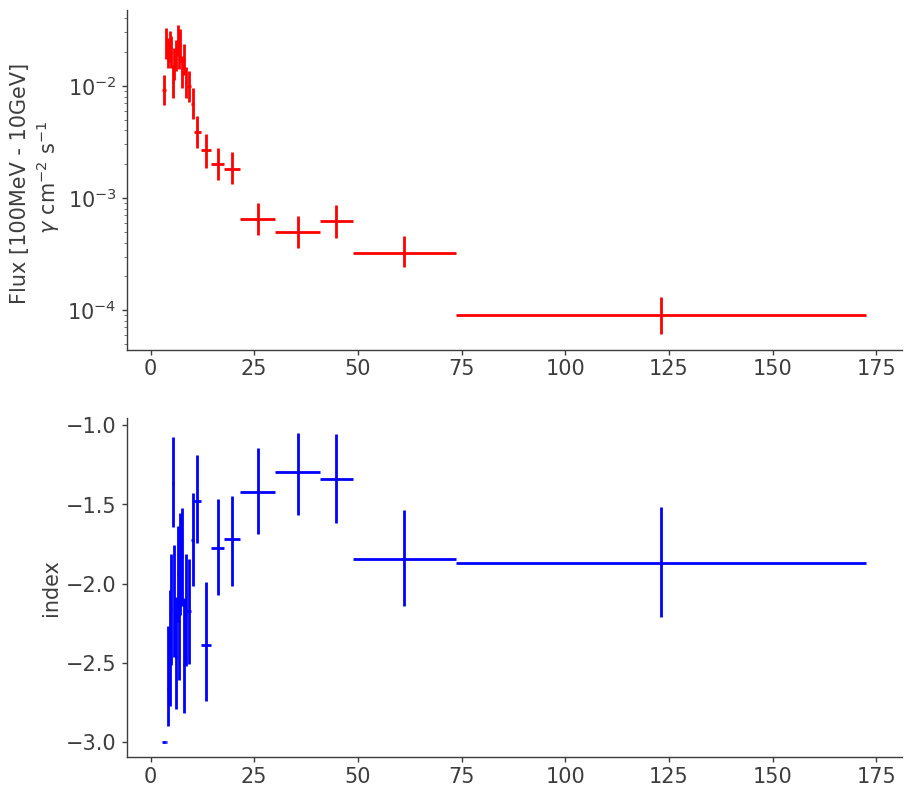

In [18]:
variates = ["F", "index"]
y = {}
for n in variates:
    y[n] = []
    y[n + "_p"] = []
    y[n + "_n"] = []
x = []
dx = []


for T0, T1 in zip(intervals[:-1], intervals[1:]):
    LAT_name = "LAT_%06.3f-%06.3f" % (T0, T1)
    x.append((T1 + T0) / 2)
    dx.append((T1 - T0) / 2)
    jl = results[LAT_name]
    res = jl.results
    mod = res.optimized_model
    ps = mod.point_sources

    for n in variates:
        my_variate = res.get_variates("GRB.spectrum.main.Powerlaw_flux.%s" % n)
        y[n].append(my_variate.median)
        y[n + "_p"].append(my_variate.equal_tail_interval()[1] - my_variate.median)
        y[n + "_n"].append(my_variate.median - my_variate.equal_tail_interval()[0])
        pass
    pass

fig = plt.figure(figsize=(10, 15))
colors = ["r", "b"]
ylabels = ["Flux [100MeV - 10GeV] \n $\gamma$ cm$^{-2}$ s$^{-1}$", "index"]
for i, n in enumerate(variates):
    plt.subplot(len(variates) + 1, 1, i + 1)
    plt.errorbar(x, y[n], xerr=dx, yerr=(y[n + "_n"], y[n + "_p"]), ls="", c=colors[i])
    if i == 0:
        plt.yscale("log")
    # plt.xscale('log')
    plt.ylabel(ylabels[i])
    pass